<img src='Figs/price-word-cloud-concept-collage-made-words-vector-illustration-275336010-3710185224.jpg' align='center' width=60%/>

# Introduction to Price Elasticity of Demand

## Example from Price Elasticity of Demand, Statistical Modeling with Python

In [1]:
#!pip install statsmodels

In [2]:
%matplotlib inline
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


%%latex

We define Price Elasticity of Demand $E_{P}^{D}$ as it follows:
$$
\begin{equation}
E_{P}^{D} = \frac{\Delta Q / Q}{\Delta P / P} = \frac{\Delta Q}{\Delta P}\frac{P}{Q};\ \\
%\text{Em que:}
\end{equation}
$$
where:
$$
\begin{equation}
\Delta Q / Q = \bigg[\frac{q_{i+1} - q_{i}}{q_{i}}\bigg]; \\ \
\Delta P / P = \bigg[\frac{p_{i+1} - p_{i}}{p_{i}}\bigg]
\end{equation}
$$

For which $a$ mich From which follows:

$$
\begin{equation}
\frac{\Delta Q}{\Delta P} = E_{P}^{D} \frac{\overline{Q}}{{P}}
\end{equation}
$$

<img src='Figs/Delta_to_d.jpg' align='center' width=10%/>

Once we intent to model Sales Quantity $Q$ as a function of Product Price $P$, we write:

$$
\begin{equation}
Q = a + b P \\ \
\end{equation}
$$

When $\Delta \rightarrow 0$, by [The Mean Value Theorem](https://tutorial.math.lamar.edu/Classes/CalcI/MeanValueTheorem.aspx) we adopt medium values for Quantity ($Q \rightarrow Q_{m}$) and Price ($P \rightarrow P_{m}$).

$$
\begin{equation}
b = \lim_{\Delta\to 0} \frac{\Delta Q}{\Delta P} = \frac{dQ}{dP} = E_{P}^{D} \frac{Q_{m}}{{P_{m}}}
\end{equation}
$$



Which provides for Quantity:

$$
\begin{equation}
Q = a + \bigg(E_{P}^{D} \frac{Q_{m}}{P_{m}}\bigg) P \\ \
\end{equation}
$$

$$
\begin{equation}
b = \lim_{\Delta \rightarrow 0} \frac{\Delta Q}{\Delta P} = \frac{dQ}{dP}
\end{equation}
$$

## Data From ANP

In [3]:
convert_to_en = False
convert_to_en = True

In [4]:
#!pip install openpyxl

In [5]:
Input = 'Data/Raw/'
Output_Fig = 'Figs/'

### Fuel Pricing

- [PRECO MÉDIO REVENDA/AVERAGE_RESALE_PRICE] = R$/L

In [6]:
ANP_Price_Monthly_Regional_2001_2012 = pd.read_excel(
    io = Input + 'mensal-regioes-2001-a-2012.xlsx', 
    engine = 'openpyxl', 
    #index_col = 0,
    header = 12)
print('ANP_Price_Monthly_Regional_2001_2012:')      
display(ANP_Price_Monthly_Regional_2001_2012.head())
display(ANP_Price_Monthly_Regional_2001_2012.tail())

ANP_Price_Monthly_Regional_2013_2024 = pd.read_excel(
    io = Input + 'mensal-regioes-desde-jan2013.xlsx', 
    engine = 'openpyxl', 
    #index_col = 0,
    header = 16)
print('ANP_Price_Monthly_Regional_2013_2024:')
display(ANP_Price_Monthly_Regional_2013_2024.head())
display(ANP_Price_Monthly_Regional_2013_2024.tail())


print('ANP_Price_Monthly_Regional_2001_2024:')
ANP_Price_Monthly_Regional_2001_2024 = pd.concat([ANP_Price_Monthly_Regional_2001_2012, ANP_Price_Monthly_Regional_2013_2024])
display(ANP_Price_Monthly_Regional_2001_2024.head())
display(ANP_Price_Monthly_Regional_2001_2024.tail())

ANP_Price_Monthly_Regional_2001_2012:


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2001-07-01,ETANOL HIDRATADO,CENTRO OESTE,1461,R$/l,1.0885,0.10834,0.807,1.490,0.2823,0.099531,0.8062,0.09879,0.4408,1.1,0.123
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,3442,R$/l,1.1212,0.10078,0.790,1.580,0.1735,0.089886,0.9477,0.09202,0.4339,1.2284,0.097
2,2001-07-01,ETANOL HIDRATADO,NORTE,935,R$/l,1.2626,0.08097,0.881,1.490,0.2190,0.064130,1.0436,0.13421,0.5586,1.5775,0.129
3,2001-07-01,ETANOL HIDRATADO,SUDESTE,10169,R$/l,0.9352,0.14279,0.639,1.405,0.1808,0.152684,0.7544,0.13446,0.3182,1.5607,0.178
4,2001-07-01,ETANOL HIDRATADO,SUL,1892,R$/l,1.0171,0.16526,0.677,1.450,0.1951,0.162482,0.822,0.14243,0.4645,1.1959,0.173


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
3370,2012-12-01,ÓLEO DIESEL,CENTRO OESTE,2171,R$/l,2.253,0.140,1.990,2.670,0.215,0.062139,2.038,0.094,1.82,2.3,0.046
3371,2012-12-01,ÓLEO DIESEL,NORDESTE,5832,R$/l,2.105,0.074,1.889,2.459,0.197,0.035154,1.908,0.068,1.7275,2.0851,0.036
3372,2012-12-01,ÓLEO DIESEL,NORTE,2260,R$/l,2.277,0.164,1.990,2.950,0.251,0.072025,2.026,0.093,1.795,2.57,0.046
3373,2012-12-01,ÓLEO DIESEL,SUDESTE,13331,R$/l,2.122,0.080,1.869,2.499,0.225,0.037700,1.897,0.063,1.6601,2.2006,0.033
3374,2012-12-01,ÓLEO DIESEL,SUL,4740,R$/l,2.137,0.081,1.899,2.470,0.230,0.037904,1.907,0.048,1.7125,2.065,0.025


ANP_Price_Monthly_Regional_2013_2024:


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,MARGEM MÉDIA REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2013-01-01,ETANOL HIDRATADO,CENTRO OESTE,2895,R$/l,2.005,0.160,1.497,2.449,0.316,0.08,1.689,0.136,1.41,2.057,0.081
1,2013-01-01,ETANOL HIDRATADO,NORDESTE,7073,R$/l,2.208,0.120,1.840,2.720,0.245,0.054,1.963,0.118,1.5258,2.4236,0.06
2,2013-01-01,ETANOL HIDRATADO,NORTE,1685,R$/l,2.323,0.170,1.990,3.120,0.265,0.073,2.058,0.113,1.6239,2.4745,0.055
3,2013-01-01,ETANOL HIDRATADO,SUDESTE,20625,R$/l,1.889,0.229,1.479,2.790,0.264,0.121,1.625,0.202,1.2199,2.4626,0.124
4,2013-01-01,ETANOL HIDRATADO,SUL,7306,R$/l,2.085,0.231,1.730,2.770,0.252,0.111,1.833,0.202,1.4417,2.3457,0.11


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,MARGEM MÉDIA REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
4507,2024-11-01,OLEO DIESEL S10,CENTRO OESTE,850,R$/l,6.05,0.284,5.49,7.57,0.047,-,-,-,-,-,-
4508,2024-11-01,OLEO DIESEL S10,NORDESTE,2493,R$/l,5.96,0.300,5.44,6.99,0.05,-,-,-,-,-,-
4509,2024-11-01,OLEO DIESEL S10,NORTE,826,R$/l,6.35,0.545,5.53,7.99,0.086,-,-,-,-,-,-
4510,2024-11-01,OLEO DIESEL S10,SUDESTE,5132,R$/l,6.02,0.335,5.46,8.99,0.056,-,-,-,-,-,-
4511,2024-11-01,OLEO DIESEL S10,SUL,1925,R$/l,6.03,0.263,5.39,6.99,0.044,-,-,-,-,-,-


ANP_Price_Monthly_Regional_2001_2024:


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
0,2001-07-01,ETANOL HIDRATADO,CENTRO OESTE,1461,R$/l,1.0885,0.10834,0.807,1.490,0.2823,...,0.09879,0.4408,1.1,0.123,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,3442,R$/l,1.1212,0.10078,0.790,1.580,0.1735,...,0.09202,0.4339,1.2284,0.097,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-07-01,ETANOL HIDRATADO,NORTE,935,R$/l,1.2626,0.08097,0.881,1.490,0.219,...,0.13421,0.5586,1.5775,0.129,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-07-01,ETANOL HIDRATADO,SUDESTE,10169,R$/l,0.9352,0.14279,0.639,1.405,0.1808,...,0.13446,0.3182,1.5607,0.178,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-07-01,ETANOL HIDRATADO,SUL,1892,R$/l,1.0171,0.16526,0.677,1.450,0.1951,...,0.14243,0.4645,1.1959,0.173,NaN,NaN,NaN,NaN,NaN,NaN


,MÊS,PRODUTO,REGIÃO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
4507,2024-11-01,OLEO DIESEL S10,CENTRO OESTE,850,R$/l,NaN,0.284,NaN,NaN,-,...,-,NaN,NaN,-,6.05,5.49,7.57,-,-,-
4508,2024-11-01,OLEO DIESEL S10,NORDESTE,2493,R$/l,NaN,0.300,NaN,NaN,-,...,-,NaN,NaN,-,5.96,5.44,6.99,-,-,-
4509,2024-11-01,OLEO DIESEL S10,NORTE,826,R$/l,NaN,0.545,NaN,NaN,-,...,-,NaN,NaN,-,6.35,5.53,7.99,-,-,-
4510,2024-11-01,OLEO DIESEL S10,SUDESTE,5132,R$/l,NaN,0.335,NaN,NaN,-,...,-,NaN,NaN,-,6.02,5.46,8.99,-,-,-
4511,2024-11-01,OLEO DIESEL S10,SUL,1925,R$/l,NaN,0.263,NaN,NaN,-,...,-,NaN,NaN,-,6.03,5.39,6.99,-,-,-


In [7]:
ANP_Price_Monthly_Regional_2001_2024.columns

Index(['MÊS', 'PRODUTO', 'REGIÃO', 'NÚMERO DE POSTOS PESQUISADOS',
       'UNIDADE DE MEDIDA', 'PRECO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA',
       'PRECO MÍNIMO REVENDA', 'PRECO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PRECO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PRECO MÍNIMO DISTRIBUIÇÃO',
       'PRECO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'PREÇO MÉDIO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA',
       'PREÇO MÉDIO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO'],
      dtype='object')

We edit the source data by:
- Choosing Specific Columns
- Editing dates 

- [Entenda a diferença entre etanol hidratado e etanol anidro](https://autopapo.com.br/blog-do-boris/etanol-hidratado-etanol-anidro/)
- [Hydrous Ethanol](https://www.sciencedirect.com/topics/engineering/hydrous-ethanol)
- 

In [8]:
#convert_to_en = False
#convert_to_en = True

ANP_Price_Monthly_Regional_2001_2024_edited = ANP_Price_Monthly_Regional_2001_2024[['MÊS', 'PRODUTO', 'REGIÃO', 'PREÇO MÉDIO REVENDA']]

ANP_Price_Monthly_Regional_2001_2024_edited_copy = ANP_Price_Monthly_Regional_2001_2024_edited.copy()
ANP_Price_Monthly_Regional_2001_2024_edited_copy['MÊS'] = ANP_Price_Monthly_Regional_2001_2024_edited['MÊS'].dt.month
ANP_Price_Monthly_Regional_2001_2024_edited_copy['ANO'] = ANP_Price_Monthly_Regional_2001_2024_edited['MÊS'].dt.year
ANP_Price_Monthly_Regional_2001_2024_edited_copy = ANP_Price_Monthly_Regional_2001_2024_edited_copy[['ANO', 'MÊS', 'PRODUTO', 'REGIÃO', 'PREÇO MÉDIO REVENDA']]


if convert_to_en == True:

    dict_regions = {
        'NORDESTE' : 'NORTHEAST', 
        'CENTRO OESTE' : 'CENTRAL-WEST', 
        'SUL': 'SOUTH',
        'SUDESTE' : 'SOUTHEAST', 
        'NORTE' : 'NORTH'
    }

    ANP_Price_Monthly_Regional_2001_2024_edited_copy['REGIÃO'] = ANP_Price_Monthly_Regional_2001_2024_edited['REGIÃO'].map(dict_regions)

    dict_fuels = {
        'ETANOL HIDRATADO' : 'HYDRATED ETHANOL',
        'GASOLINA COMUM' : 'REGULAR GASOLINE', 
        'GLP': 'LPG', 
        'GNV': 'NGV', 
        'ÓLEO DIESEL' : 'DIESEL', 
        'OLEO DIESEL' : 'DIESEL', 
        'OLEO DIESEL S10' : 'DIESEL S10', 
        'GASOLINA ADITIVADA' : 'ADDITIVE GASOLINE',
        }

    ANP_Price_Monthly_Regional_2001_2024_edited_copy['PRODUTO'] = ANP_Price_Monthly_Regional_2001_2024_edited['PRODUTO'].map(dict_fuels)

    dict_colunms = {
    'ANO' : 'YEAR', 
    'MÊS' : 'MONTH',        
    'PRODUTO' : 'PRODUCT', 
    'REGIÃO' : 'REGION', 
    'PREÇO MÉDIO REVENDA' : 'AVERAGE_RESALE_PRICE',}

    #ANP_Price_Monthly_Regional_2001_2024_edited.columns = ANP_Price_Monthly_Regional_2001_2024_edited.columns.map(dict_colunms)

    ANP_Price_Monthly_Regional_2001_2024_edited_copy = ANP_Price_Monthly_Regional_2001_2024_edited_copy.rename(columns = dict_colunms)

if convert_to_en == False:

    dict_regions = {
        'NORDESTE' : 'NORDESTE', 
        'CENTRO OESTE' : 'CENTRO-OESTE', 
        'SUL': 'SUL',
        'SUDESTE' : 'SUDESTE', 
        'NORTE' : 'NORTE'
    }

    ANP_Price_Monthly_Regional_2001_2024_edited_copy['REGIÃO'] = ANP_Price_Monthly_Regional_2001_2024_edited['REGIÃO'].map(dict_regions)

    dict_colunms = {
    'PREÇO MÉDIO REVENDA' : 'PREÇO_MÉDIO_REVENDA',}

    #ANP_Price_Monthly_Regional_2001_2024_edited_copy.columns = ANP_Price_Monthly_Regional_2001_2024_edited.columns.map(dict_colunms)
    #ANP_Price_Monthly_Regional_2001_2024_edited = ANP_Price_Monthly_Regional_2001_2024_edited.rename(columns = dict_colunms)
    ANP_Price_Monthly_Regional_2001_2024_edited_copy = ANP_Price_Monthly_Regional_2001_2024_edited_copy.rename(columns = dict_colunms)

    dict_fuels = {
        'ETANOL HIDRATADO' : 'ETANOL HIDRATADO',
        'GASOLINA COMUM' : 'GASOLINA COMUM', 
        'GLP': 'GLP', 
        'GNV': 'GNV', 
        'ÓLEO DIESEL' : 'DIESEL', 
        'OLEO DIESEL' : 'DIESEL', 
        'OLEO DIESEL S10' : 'DIESEL S10', 
        'GASOLINA ADITIVADA' : 'GASOLINA ADITIVADA',
        }

    ANP_Price_Monthly_Regional_2001_2024_edited_copy['PRODUTO'] = ANP_Price_Monthly_Regional_2001_2024_edited['PRODUTO'].map(dict_fuels)


ANP_Price_Monthly_Regional_2001_2024_edited = ANP_Price_Monthly_Regional_2001_2024_edited_copy.copy()


del ANP_Price_Monthly_Regional_2001_2024_edited_copy
print('ANP_Price_Monthly_Regional_2001_2024_edited.columns:')
display(ANP_Price_Monthly_Regional_2001_2024_edited.columns)
print('')
print('ANP_Price_Monthly_Regional_2001_2024_edited.info():')
display(ANP_Price_Monthly_Regional_2001_2024_edited.info())
print('')
print('ANP_Price_Monthly_Regional_2001_2024_edited:')
display(ANP_Price_Monthly_Regional_2001_2024_edited.head())
display(ANP_Price_Monthly_Regional_2001_2024_edited.tail())

ANP_Price_Monthly_Regional_2001_2024_edited.columns:


Index(['YEAR', 'MONTH', 'PRODUCT', 'REGION', 'AVERAGE_RESALE_PRICE'], dtype='object')


ANP_Price_Monthly_Regional_2001_2024_edited.info():
<class 'pandas.core.frame.DataFrame'>
Index: 7887 entries, 0 to 4511
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  7887 non-null   int32  
 1   MONTH                 7887 non-null   int32  
 2   PRODUCT               7887 non-null   object 
 3   REGION                7887 non-null   object 
 4   AVERAGE_RESALE_PRICE  4512 non-null   float64
dtypes: float64(1), int32(2), object(2)
memory usage: 308.1+ KB


None


ANP_Price_Monthly_Regional_2001_2024_edited:


,YEAR,MONTH,PRODUCT,REGION,AVERAGE_RESALE_PRICE
0,2001,7,HYDRATED ETHANOL,CENTRAL-WEST,NaN
1,2001,7,HYDRATED ETHANOL,NORTHEAST,NaN
2,2001,7,HYDRATED ETHANOL,NORTH,NaN
3,2001,7,HYDRATED ETHANOL,SOUTHEAST,NaN
4,2001,7,HYDRATED ETHANOL,SOUTH,NaN


,YEAR,MONTH,PRODUCT,REGION,AVERAGE_RESALE_PRICE
4507,2024,11,DIESEL S10,CENTRAL-WEST,6.05
4508,2024,11,DIESEL S10,NORTHEAST,5.96
4509,2024,11,DIESEL S10,NORTH,6.35
4510,2024,11,DIESEL S10,SOUTHEAST,6.02
4511,2024,11,DIESEL S10,SOUTH,6.03


### Fuel Sales

- [Vendas de derivados petróleo e etanol (metros cúbicos) 1990-2024](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/vendas-de-derivados-de-petroleo-e-biocombustiveis)

- [VENDAS(L)/SALES_AVERAGE] = L

In [9]:
ANP_Sales_Monthly_Regional_1990_2023 = pd.read_csv(
    #filepath_or_buffer = Input + 'vendas-anuais-de-gasolina-c-por-municipio.csv', sep  = ';'
    filepath_or_buffer = Input + 'vendas-combustiveis-m3-1990-2024.csv', sep  = ';'
    )
print('ANP_Sales_Monthly_Regional_1990_2023:')
display(ANP_Sales_Monthly_Regional_1990_2023.head())
display(ANP_Sales_Monthly_Regional_1990_2023.tail())

ANP_Sales_Monthly_Regional_1990_2023:


,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO NORDESTE,MARANHÃO,ETANOL HIDRATADO,"7578,939"
1,1990,JUL,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"24462,251"
2,1990,JUN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"25005,954"
3,1990,MAI,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"18888,239"
4,1990,ABR,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"27535,918"


,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
90499,2024,JUN,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"83468,857"
90500,2024,MAI,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"80203,941"
90501,2024,ABR,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"75102,114"
90502,2024,FEV,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"70307,273"
90503,2024,OUT,REGIÃO NORDESTE,PIAUÍ,ÓLEO DIESEL,"62341,4"


In [10]:
#ANP_Sales_Monthly_Regional_1990_2023#['PRODUTO'].unique()
#ANP_Sales_Monthly_Regional_1990_2023_edited

We edit the source data by:
- Choosing Specific Columns
- Editing dates 
- [Converting](https://mathda.com/convert/pt/volume/cub-meter-to-liter) unities Cubic Metric $(mˆ{3} )\rightarrow (L)$ Liter: 

$$
\begin{equation}
%E=m
1 m^{3} = 10^{3} L
\end{equation}
$$

In [11]:
#convert_to_en = False
#convert_to_en = True

ANP_Sales_Monthly_Regional_1990_2023_edited = ANP_Sales_Monthly_Regional_1990_2023[['ANO', 'MÊS', 'GRANDE REGIÃO', 'PRODUTO', 'VENDAS']]

dict_month = {
    'JAN' : 1,
    'FEV' : 2,
    'MAR' : 3,
    'ABR' : 4,
    'MAI' : 5,
    'JUN' : 6,
    'JUL' : 7,
    'AGO' : 8, 
    'SET' : 9, 
    'OUT' : 10, 
    'NOV' : 11, 
    'DEZ' : 12,
    } 

ANP_Sales_Monthly_Regional_1990_2023_edited_copy = ANP_Sales_Monthly_Regional_1990_2023_edited.copy()

ANP_Sales_Monthly_Regional_1990_2023_edited_copy = ANP_Sales_Monthly_Regional_1990_2023_edited.copy()
ANP_Sales_Monthly_Regional_1990_2023_edited_copy['MÊS'] = ANP_Sales_Monthly_Regional_1990_2023_edited['MÊS'].map(dict_month)
ANP_Sales_Monthly_Regional_1990_2023_edited_copy['ANO'] = ANP_Sales_Monthly_Regional_1990_2023_edited['ANO'].astype(np.int32)
ANP_Sales_Monthly_Regional_1990_2023_edited_copy['MÊS'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['MÊS'].astype(np.int32)

dict_month
list_float_value = []
for numeric_string in ANP_Sales_Monthly_Regional_1990_2023_edited['VENDAS']:

    #numeric_string = '1,234.56'
    float_value = float(numeric_string.replace(',', ''))
    list_float_value.append(float_value)
    #print(float_value)

ANP_Sales_Monthly_Regional_1990_2023_edited_copy['VENDAS'] = pd.Series(list_float_value)
ANP_Sales_Monthly_Regional_1990_2023_edited_copy['VENDAS_L'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['VENDAS'] * 1000
del ANP_Sales_Monthly_Regional_1990_2023_edited_copy['VENDAS']

if convert_to_en == True:

    dict_regions = {
        'REGIÃO NORDESTE' : 'NORTHEAST', 
        'REGIÃO CENTRO-OESTE' : 'CENTRAL-WEST', 
        'REGIÃO SUL': 'SOUTH',
        'REGIÃO SUDESTE' : 'SOUTHEAST', 
        'REGIÃO NORTE' : 'NORTH'
    }

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy['GRANDE REGIÃO'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['GRANDE REGIÃO'].map(dict_regions)
    
    dict_fuels = {
        'ETANOL HIDRATADO' : 'HYDRATED ETHANOL',
        'GASOLINA C' : 'REGULAR GASOLINE', 
        'GASOLINA DE AVIAÇÃO' : 'AVIATION GASOLINE',
        'GLP': 'LPG',
        'QUEROSENE DE AVIAÇÃO' : 'AVIATION KEROSENE', 
        'QUEROSENE ILUMINANTE' : 'ILLUMINATING KEROSENE', 
        'ÓLEO COMBUSTÍVEL' : 'FUEL OIL',
        'ÓLEO DIESEL' : 'DIESEL',
        }

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy['PRODUTO'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['PRODUTO'].map(dict_fuels)

    dict_colunms = {
    'PRODUTO' : 'PRODUCT', 
    'GRANDE REGIÃO' : 'REGION', 
    'VENDAS_L' : 'SALES',
    #'VENDAS' : 'SALES', 
    'ANO' : 'YEAR', 
    'MÊS' : 'MONTH',}

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy.columns = ANP_Sales_Monthly_Regional_1990_2023_edited_copy.columns.map(dict_colunms)
    
    #del ANP_Sales_Monthly_Regional_1990_2023_edited_copy['SALES']

if convert_to_en == False:

    dict_regions = {
        'REGIÃO NORDESTE' : 'NORDESTE', 
        'REGIÃO CENTRO-OESTE' : 'CENTRO-OESTE', 
        'REGIÃO SUL': 'SUL',
        'REGIÃO SUDESTE' : 'SUDESTE', 
        'REGIÃO NORTE' : 'NORTE'
    }

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy['GRANDE REGIÃO'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['GRANDE REGIÃO'].map(dict_regions)

    dict_fuels = {
        'ETANOL HIDRATADO' : 'ETANOL HIDRATADO',
        'GASOLINA C' : 'GASOLINA COMUM', 
        'GASOLINA DE AVIAÇÃO' : 'GASOLINA DE AVIAÇÃO',
        'GLP': 'GLP',
        'QUEROSENE DE AVIAÇÃO' : 'QUEROSENE DE AVIAÇÃO', 
        'QUEROSENE ILUMINANTE' : 'QUEROSENE ILUMINANTE', 
        'ÓLEO COMBUSTÍVEL' : 'ÓLEO COMBUSTÍVEL',
        'ÓLEO DIESEL' : 'DIESEL',
        }

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy['PRODUTO'] = ANP_Sales_Monthly_Regional_1990_2023_edited_copy['PRODUTO'].map(dict_fuels)

    dict_colunms = {
    'ANO' : 'ANO', 
    'MÊS' : 'MÊS', 
    'GRANDE REGIÃO' : 'REGIÃO',
    'PRODUTO' : 'PRODUTO', 
    #'VENDAS' : 'VENDAS',
    'VENDAS_L' : 'VENDAS'

    }

    ANP_Sales_Monthly_Regional_1990_2023_edited_copy.columns = ANP_Sales_Monthly_Regional_1990_2023_edited_copy.columns.map(dict_colunms)

    


ANP_Sales_Monthly_Regional_1990_2023_edited = ANP_Sales_Monthly_Regional_1990_2023_edited_copy.copy()

del ANP_Sales_Monthly_Regional_1990_2023_edited_copy

print('ANP_Sales_Monthly_Regional_1990_2023_edited.columns:')
display(ANP_Sales_Monthly_Regional_1990_2023_edited.columns)
print('')
print('ANP_Sales_Monthly_Regional_1990_2023_edited.info():')
display(ANP_Sales_Monthly_Regional_1990_2023_edited.info())
print('')
print('ANP_Sales_Monthly_Regional_1990_2023_edited:')
display(ANP_Sales_Monthly_Regional_1990_2023_edited.head())
display(ANP_Sales_Monthly_Regional_1990_2023_edited.tail())

ANP_Sales_Monthly_Regional_1990_2023_edited.columns:


Index(['YEAR', 'MONTH', 'REGION', 'PRODUCT', 'SALES'], dtype='object')


ANP_Sales_Monthly_Regional_1990_2023_edited.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90504 entries, 0 to 90503
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     90504 non-null  int32  
 1   MONTH    90504 non-null  int32  
 2   REGION   90504 non-null  object 
 3   PRODUCT  90504 non-null  object 
 4   SALES    90504 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 2.8+ MB


None


ANP_Sales_Monthly_Regional_1990_2023_edited:


,YEAR,MONTH,REGION,PRODUCT,SALES
0,1990,1,NORTHEAST,HYDRATED ETHANOL,7.578939e+09
1,1990,7,CENTRAL-WEST,HYDRATED ETHANOL,2.446225e+10
2,1990,6,CENTRAL-WEST,HYDRATED ETHANOL,2.500595e+10
3,1990,5,CENTRAL-WEST,HYDRATED ETHANOL,1.888824e+10
4,1990,4,CENTRAL-WEST,HYDRATED ETHANOL,2.753592e+10


,YEAR,MONTH,REGION,PRODUCT,SALES
90499,2024,6,NORTH,DIESEL,8.346886e+10
90500,2024,5,NORTH,DIESEL,8.020394e+10
90501,2024,4,NORTH,DIESEL,7.510211e+10
90502,2024,2,NORTH,DIESEL,7.030727e+10
90503,2024,10,NORTHEAST,DIESEL,6.234140e+08


### Merging Fuel Prices and Sales

In [12]:
print('ANP_Price_Monthly_Regional_2001_2024_edited:')
print('')
print('\t ANP_Price_Monthly_Regional_2001_2024_edited.info():')
print(ANP_Price_Monthly_Regional_2001_2024_edited.info())
print('')
print('\t ANP_Price_Monthly_Regional_2001_2024_edited.columns:')
print(ANP_Price_Monthly_Regional_2001_2024_edited.columns)
print('')
print('\t ANP_Price_Monthly_Regional_2001_2024_edited.describe():')
display(ANP_Price_Monthly_Regional_2001_2024_edited.describe().T)

ANP_Price_Monthly_Regional_2001_2024_edited:

	 ANP_Price_Monthly_Regional_2001_2024_edited.info():
<class 'pandas.core.frame.DataFrame'>
Index: 7887 entries, 0 to 4511
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  7887 non-null   int32  
 1   MONTH                 7887 non-null   int32  
 2   PRODUCT               7887 non-null   object 
 3   REGION                7887 non-null   object 
 4   AVERAGE_RESALE_PRICE  4512 non-null   float64
dtypes: float64(1), int32(2), object(2)
memory usage: 308.1+ KB
None

	 ANP_Price_Monthly_Regional_2001_2024_edited.columns:
Index(['YEAR', 'MONTH', 'PRODUCT', 'REGION', 'AVERAGE_RESALE_PRICE'], dtype='object')

	 ANP_Price_Monthly_Regional_2001_2024_edited.describe():


,count,mean,std,min,25%,50%,75%,max
YEAR,7887.0,2013.599214,6.771740,2001.000,2008.0000,2014.000,2020.00,2024.000
MONTH,7887.0,6.531634,3.446189,1.000,4.0000,7.000,10.00,12.000
AVERAGE_RESALE_PRICE,4512.0,14.898619,27.253965,1.658,3.0055,3.889,5.96,123.437


In [13]:
print('')
print('ANP_Sales_Monthly_Regional_1990_2023_edited:')
print('')
print('\t ANP_Sales_Monthly_Regional_1990_2023_edited.info():')
print(ANP_Sales_Monthly_Regional_1990_2023_edited.info())
print('')
print('\t ANP_Sales_Monthly_Regional_1990_2023_edited.describe():')
display(ANP_Sales_Monthly_Regional_1990_2023_edited.describe().T)


ANP_Sales_Monthly_Regional_1990_2023_edited:

	 ANP_Sales_Monthly_Regional_1990_2023_edited.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90504 entries, 0 to 90503
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     90504 non-null  int32  
 1   MONTH    90504 non-null  int32  
 2   REGION   90504 non-null  object 
 3   PRODUCT  90504 non-null  object 
 4   SALES    90504 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 2.8+ MB
None

	 ANP_Sales_Monthly_Regional_1990_2023_edited.describe():


,count,mean,std,min,25%,50%,75%,max
YEAR,90504.0,2.006959e+03,1.007736e+01,1990.0,1998.0,2.007000e+03,2.016000e+03,2.024000e+03
MONTH,90504.0,6.486874e+00,3.445703e+00,1.0,3.0,6.000000e+00,9.000000e+00,1.200000e+01
SALES,90504.0,9.263406e+11,2.018744e+12,-3036000.0,114176750.0,8.253589e+09,4.070510e+11,9.998157e+12


In [14]:
#ANP_Sales_Monthly_Regional_1990_2023_edited
#ANP_Price_Monthly_Regional_2001_2024_edited

In [15]:
if convert_to_en == True:

    ANP_Price_Sales_Monthly_Regional_2001_2024_edited = ANP_Price_Monthly_Regional_2001_2024_edited.merge(
        ANP_Sales_Monthly_Regional_1990_2023_edited, 
        on = ['YEAR', 'MONTH', 'PRODUCT', 'REGION',],
        how = 'inner'
        )
    ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATE'] = ANP_Price_Sales_Monthly_Regional_2001_2024_edited['YEAR'].astype(str) + '-' + ANP_Price_Sales_Monthly_Regional_2001_2024_edited['MONTH'].astype(str)
    ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATE'] = pd.to_datetime(ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATE'])

if convert_to_en == False:

    ANP_Price_Sales_Monthly_Regional_2001_2024_edited = ANP_Price_Monthly_Regional_2001_2024_edited.merge(
        ANP_Sales_Monthly_Regional_1990_2023_edited, 
        on = ['ANO', 'MÊS', 'PRODUTO', 'REGIÃO',],
        how = 'inner'
        )
    ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATA'] = ANP_Price_Sales_Monthly_Regional_2001_2024_edited['ANO'].astype(str) + '-' + ANP_Price_Sales_Monthly_Regional_2001_2024_edited['MÊS'].astype(str)
    ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATA'] = pd.to_datetime(ANP_Price_Sales_Monthly_Regional_2001_2024_edited['DATA'])


ANP_Price_Sales_Monthly_Regional_2001_2024_edited.info()
ANP_Price_Sales_Monthly_Regional_2001_2024_edited.dropna(inplace = True)
display(ANP_Price_Sales_Monthly_Regional_2001_2024_edited.head())
display(ANP_Price_Sales_Monthly_Regional_2001_2024_edited.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   YEAR                  30240 non-null  int32         
 1   MONTH                 30240 non-null  int32         
 2   PRODUCT               30240 non-null  object        
 3   REGION                30240 non-null  object        
 4   AVERAGE_RESALE_PRICE  15336 non-null  float64       
 5   SALES                 30240 non-null  float64       
 6   DATE                  30240 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 1.4+ MB


,YEAR,MONTH,PRODUCT,REGION,AVERAGE_RESALE_PRICE,SALES,DATE
14904,2013,1,HYDRATED ETHANOL,CENTRAL-WEST,2.005,3.737432e+09,2013-01-01
14905,2013,1,HYDRATED ETHANOL,CENTRAL-WEST,2.005,4.234000e+06,2013-01-01
14906,2013,1,HYDRATED ETHANOL,CENTRAL-WEST,2.005,5.840644e+09,2013-01-01
14907,2013,1,HYDRATED ETHANOL,CENTRAL-WEST,2.005,9.157891e+09,2013-01-01
14908,2013,1,HYDRATED ETHANOL,NORTHEAST,2.208,2.131838e+09,2013-01-01


,YEAR,MONTH,PRODUCT,REGION,AVERAGE_RESALE_PRICE,SALES,DATE
30235,2024,11,DIESEL,SOUTHEAST,5.91,2.292760e+11,2024-11-01
30236,2024,11,DIESEL,SOUTHEAST,5.91,6.869624e+11,2024-11-01
30237,2024,11,DIESEL,SOUTH,5.95,2.609552e+11,2024-11-01
30238,2024,11,DIESEL,SOUTH,5.95,3.932134e+11,2024-11-01
30239,2024,11,DIESEL,SOUTH,5.95,5.057223e+11,2024-11-01


In [16]:
#ANP_Price_Monthly_Regional_2001_2024_edited['PRODUCT'].unique()
#ANP_Sales_Monthly_Regional_1990_2023_edited['PRODUCT'].unique()
#ANP_Price_Sales_Monthly_Regional_2001_2024_edited['PRODUCT'].unique()

In [17]:
#ANP_Price_Monthly_Regional_2001_2024[(
#    ANP_Price_Monthly_Regional_2001_2024['PRODUTO'] == 'ETANOL HIDRATADO') \
#    &(ANP_Price_Monthly_Regional_2001_2024['REGIÃO'] == 'CENTRO OESTE')\
#    &(ANP_Price_Monthly_Regional_2001_2024['PRECO MÉDIO REVENDA'] == 1.0885	)]

In [18]:
if convert_to_en == True:
    ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg = ANP_Price_Sales_Monthly_Regional_2001_2024_edited.groupby(by = ['PRODUCT', 'REGION', 'DATE']).agg({
        'AVERAGE_RESALE_PRICE' : 'mean',
        'SALES' : 'sum'
    })

if convert_to_en == False:
    ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg = ANP_Price_Sales_Monthly_Regional_2001_2024_edited.groupby(by = ['PRODUTO', 'REGIÃO', 'DATA']).agg({
        'PREÇO_MÉDIO_REVENDA' : 'mean',
        'VENDAS' : 'sum'
    })

ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg

AVERAGE_RESALE_PRICE         SALES
PRODUCT          REGION       DATE                                          
DIESEL           CENTRAL-WEST 2013-01-01                 2.257  2.641169e+11
                              2013-02-01                 2.363  3.585734e+11
                              2013-03-01                 2.409  2.659965e+11
                              2013-04-01                 2.443  5.551729e+11
                              2013-05-01                 2.445  5.129985e+11
...                                                        ...           ...
REGULAR GASOLINE SOUTHEAST    2024-07-01                 5.890  1.391400e+12
                              2024-08-01                 6.020  1.499575e+12
                              2024-09-01                 6.000  1.329189e+12
                              2024-10-01                 6.000  1.447533e+12
                              2024-11-01                 6.010  1.285720e+12

[2840 rows x 2 columns]

In [19]:
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg.reset_index(inplace = True)
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg.sort_values(by = ['DATE'])
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg.head(10)

,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
0,DIESEL,CENTRAL-WEST,2013-01-01,2.257,2.641169e+11
1,DIESEL,CENTRAL-WEST,2013-02-01,2.363,3.585734e+11
2,DIESEL,CENTRAL-WEST,2013-03-01,2.409,2.659965e+11
3,DIESEL,CENTRAL-WEST,2013-04-01,2.443,5.551729e+11
4,DIESEL,CENTRAL-WEST,2013-05-01,2.445,5.129985e+11
5,DIESEL,CENTRAL-WEST,2013-06-01,2.445,3.005435e+11
6,DIESEL,CENTRAL-WEST,2013-07-01,2.446,5.728600e+11
7,DIESEL,CENTRAL-WEST,2013-08-01,2.449,5.617368e+11
8,DIESEL,CENTRAL-WEST,2013-09-01,2.449,6.059847e+11
9,DIESEL,CENTRAL-WEST,2013-10-01,2.451,4.257474e+11


In [20]:
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg.index
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg.shape[0]

In [21]:
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUTO'].unique()
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'].unique()

In [22]:
if convert_to_en == True:
    Filter_DIESEL = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUCT'] == 'DIESEL'
    Filter_HYDRATED_ETHANOL = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUCT'] == 'HYDRATED ETHANOL'
    Filter_LPG = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUCT'] == 'LPG'
    Filter_REGULAR_GASOLINE = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUCT'] == 'REGULAR GASOLINE'

    Filter_CENTRAL_WEST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGION'] == 'CENTRAL-WEST' 
    Filter_NORTH = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGION'] ==  'NORTH' 
    Filter_NORTH_EAST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGION'] ==  'NORTHEAST' 
    Filter_SOUTH = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGION'] ==  'SOUTH' 
    Filter_SOUTHEAST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGION'] ==  'SOUTHEAST' 

    Filter_2023 = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATE'].dt.year == 2023
    Filter_2024 = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATE'].dt.year == 2024

if convert_to_en == False:
    Filter_DIESEL = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUTO'] == 'DIESEL'
    Filter_HYDRATED_ETHANOL = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUTO'] == 'ETANOL HIDRATADO'
    Filter_LPG = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUTO'] == 'LPG'
    Filter_REGULAR_GASOLINE = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUTO'] == 'GASOLINA COMUM'
    
    Filter_CENTRAL_WEST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'] == 'CENTRO-OESTE' 
    Filter_NORTH = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'] ==  'NORTE' 
    Filter_NORTH_EAST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'] ==  'NORDESTE' 
    Filter_SOUTH = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'] ==  'SUL' 
    Filter_SOUTHEAST = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['REGIÃO'] ==  'SUDESTE' 
    
    Filter_2023 = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATA'].dt.year == 2023
    Filter_2024 = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATA'].dt.year == 2024    

Filters_Fuel = [Filter_DIESEL, Filter_HYDRATED_ETHANOL, Filter_LPG, Filter_REGULAR_GASOLINE]
Filters_Region = [Filter_CENTRAL_WEST, Filter_NORTH, Filter_NORTH_EAST, Filter_SOUTH, Filter_SOUTHEAST]
Filter_Date = [Filter_2023, Filter_2024]

In [23]:
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[Filter_REGULAR_GASOLINE & Filter_SOUTHEAST]

,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
2698,REGULAR GASOLINE,SOUTHEAST,2013-01-01,2.732,1.411254e+12
2699,REGULAR GASOLINE,SOUTHEAST,2013-02-01,2.846,9.828601e+11
2700,REGULAR GASOLINE,SOUTHEAST,2013-03-01,2.849,1.536298e+12
2701,REGULAR GASOLINE,SOUTHEAST,2013-04-01,2.846,1.487613e+12
2702,REGULAR GASOLINE,SOUTHEAST,2013-05-01,2.834,1.611120e+12
...,...,...,...,...,...
2835,REGULAR GASOLINE,SOUTHEAST,2024-07-01,5.890,1.391400e+12
2836,REGULAR GASOLINE,SOUTHEAST,2024-08-01,6.020,1.499575e+12
2837,REGULAR GASOLINE,SOUTHEAST,2024-09-01,6.000,1.329189e+12
2838,REGULAR GASOLINE,SOUTHEAST,2024-10-01,6.000,1.447533e+12


In [24]:
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[Filter_HYDRATED_ETHANOL & Filter_SOUTHEAST]

,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
1278,HYDRATED ETHANOL,SOUTHEAST,2013-01-01,1.889,6.222263e+10
1279,HYDRATED ETHANOL,SOUTHEAST,2013-02-01,1.932,5.908944e+11
1280,HYDRATED ETHANOL,SOUTHEAST,2013-03-01,2.000,5.460625e+11
1281,HYDRATED ETHANOL,SOUTHEAST,2013-04-01,2.005,5.941759e+11
1282,HYDRATED ETHANOL,SOUTHEAST,2013-05-01,1.962,5.914504e+11
...,...,...,...,...,...
1415,HYDRATED ETHANOL,SOUTHEAST,2024-07-01,3.930,1.121285e+12
1416,HYDRATED ETHANOL,SOUTHEAST,2024-08-01,4.000,1.174342e+12
1417,HYDRATED ETHANOL,SOUTHEAST,2024-09-01,3.960,1.167319e+12
1418,HYDRATED ETHANOL,SOUTHEAST,2024-10-01,3.950,1.200912e+12


In [25]:
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATE'].unique()

In [26]:
#list_years = list(range(2013, 2025, 1))
#list_years = list(range(2013, 2020, 1))
#list_years = list(range(2019, 2025, 1))
#list_years = list(range(2018, 2025, 1))
initial_year = 2013
final_year = 2025
list_years = list(range(initial_year, final_year, 1))

### Ploting Price-Sales Time Series

In [27]:
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg

,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
0,DIESEL,CENTRAL-WEST,2013-01-01,2.257,2.641169e+11
1,DIESEL,CENTRAL-WEST,2013-02-01,2.363,3.585734e+11
2,DIESEL,CENTRAL-WEST,2013-03-01,2.409,2.659965e+11
3,DIESEL,CENTRAL-WEST,2013-04-01,2.443,5.551729e+11
4,DIESEL,CENTRAL-WEST,2013-05-01,2.445,5.129985e+11
...,...,...,...,...,...
2835,REGULAR GASOLINE,SOUTHEAST,2024-07-01,5.890,1.391400e+12
2836,REGULAR GASOLINE,SOUTHEAST,2024-08-01,6.020,1.499575e+12
2837,REGULAR GASOLINE,SOUTHEAST,2024-09-01,6.000,1.329189e+12
2838,REGULAR GASOLINE,SOUTHEAST,2024-10-01,6.000,1.447533e+12


In [28]:
#df.describe()
#df.info()()
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

In [29]:
#orderOfMagnitude(number = dataframe[dataframe[label_3] >= utoff_year_1][x_variable].mean()) + 1

In [30]:
#dataframe[dataframe[label_3] >= utoff_year_1][y_variable]
#orderOfMagnitude(number = dataframe[dataframe[label_3] >= utoff_year_1][y_variable].mean())
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATE'] >= '2018-02-01']['AVERAGE_RESALE_PRICE'].describe()



#        ###
#        cutoff_year_1 = '2018-02-01'
#        ###
#        order_of_magnitude_x_variable = math.floor(math.log(df.loc[df[label_3] >= cutoff_year_1][x_variable].mean(), 10)) #orderOfMagnitude(number = df.loc[df[label_3] >= cutoff_year_1][x_variable].mean()) + 1
#        print(
#            f"df[df['{label_3}'] >= {cutoff_year_1}]['{x_variable}'].mean():",
#        round(df.loc[df[label_3] >= cutoff_year_1][x_variable].mean() / (10 ** (order_of_magnitude_x_variable)), 2), f'x 10^{order_of_magnitude_x_variable}(L)'
#        )
#        print(f'order_of_magnitude_{x_variable}:', order_of_magnitude_x_variable)
#        ###
#        order_of_magnitude_y_variable = orderOfMagnitude(number = df.loc[df[label_3] >= cutoff_year_1][y_variable].mean())
#        print(
#            f"df[df['{label_3}'] >= {cutoff_year_1}]['{y_variable}'].mean():",
#        round(df[df[label_3] >= cutoff_year_1][y_variable].mean() / (10 ** (order_of_magnitude_y_variable)), 2), f'x 10^{order_of_magnitude_y_variable}(R$/L)'
#        #round(df.loc[df[label_3] >= cutoff_year_1][y_variable].mean() / (10 ** (order_of_magnitude_y_variable)), 2), '(R$/L)'
#        #df.loc[df[label_3] >= cutoff_year_1][y_variable].mean()
#        )
#        print(f'order_of_magnitude_{y_variable}:', order_of_magnitude_y_variable)
        ###

PRODUCT : DIESEL | REGION : CENTRAL-WEST | DATE : 2013 - 2024


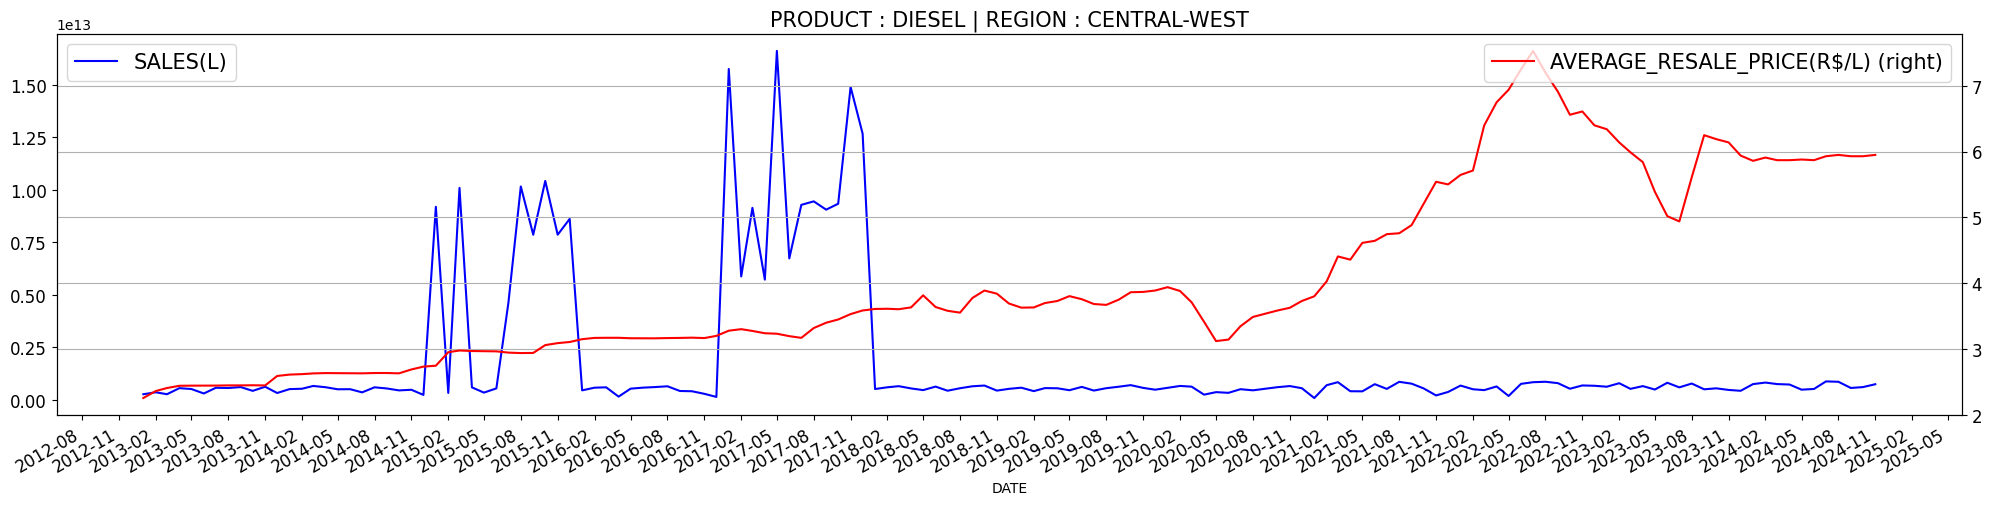

PRODUCT : DIESEL | REGION : NORTH | DATE : 2013 - 2024


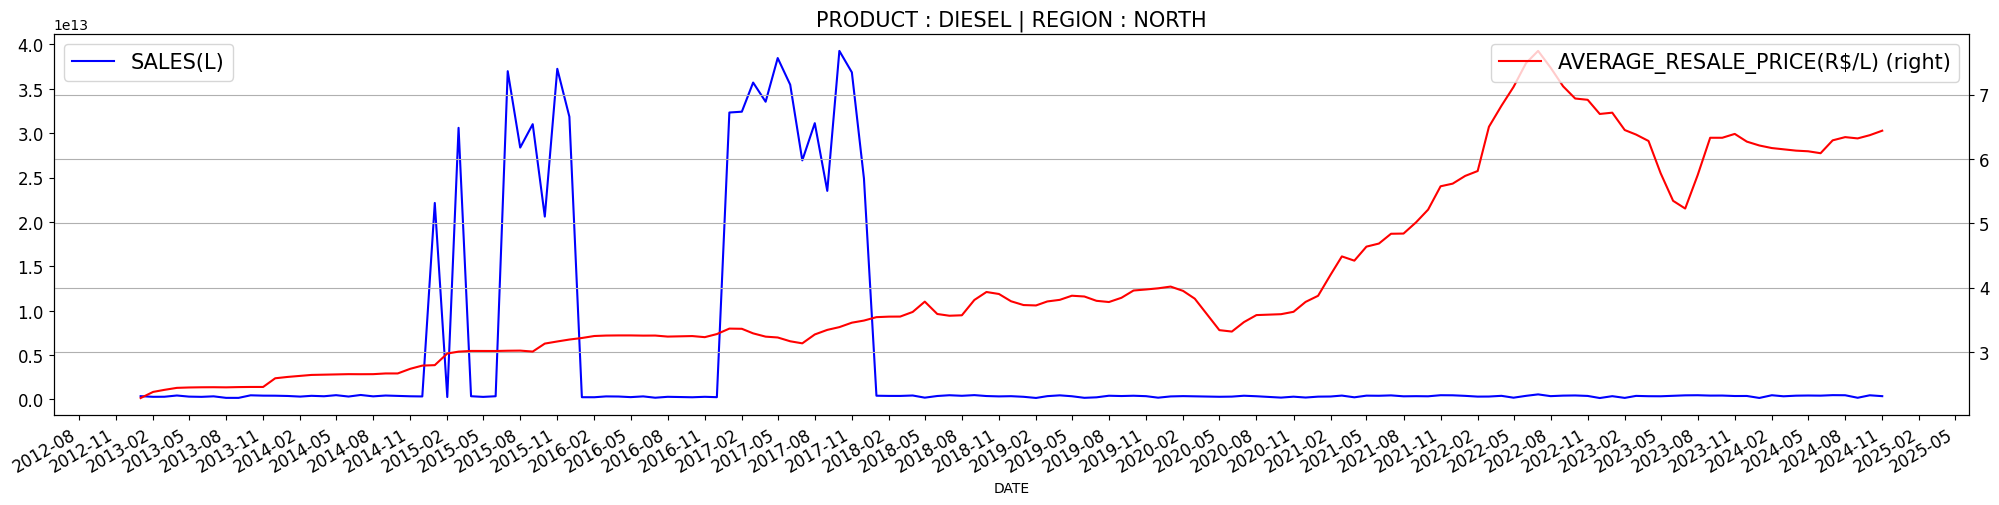

PRODUCT : DIESEL | REGION : NORTHEAST | DATE : 2013 - 2024


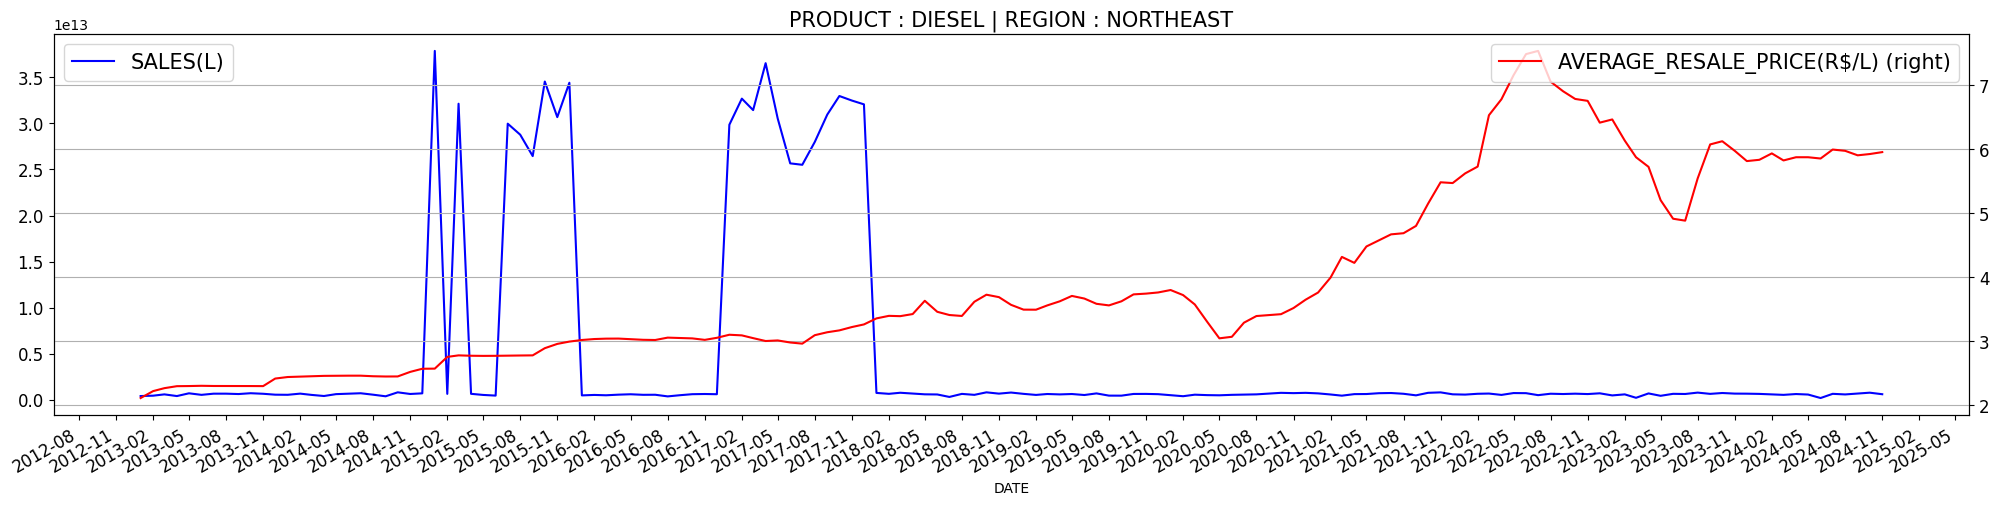

PRODUCT : DIESEL | REGION : SOUTH | DATE : 2013 - 2024


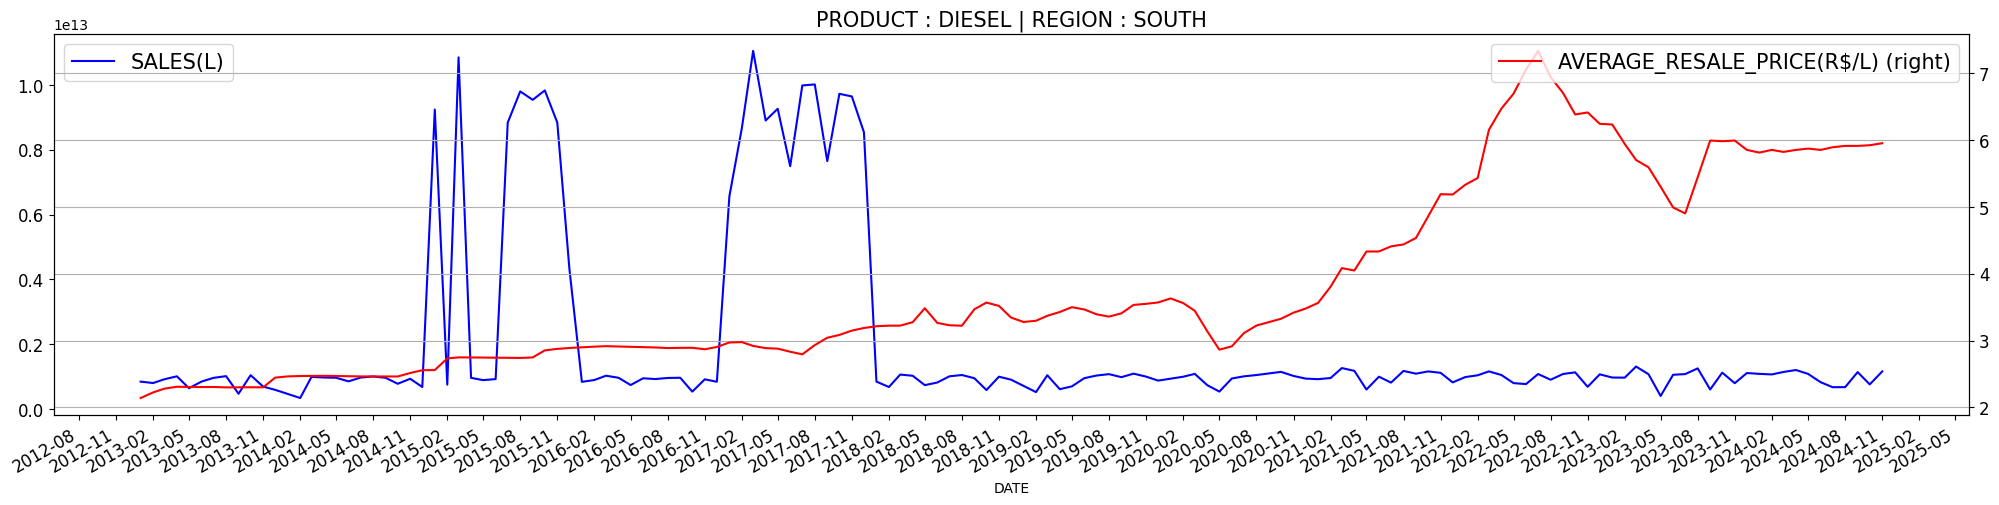

PRODUCT : DIESEL | REGION : SOUTHEAST | DATE : 2013 - 2024


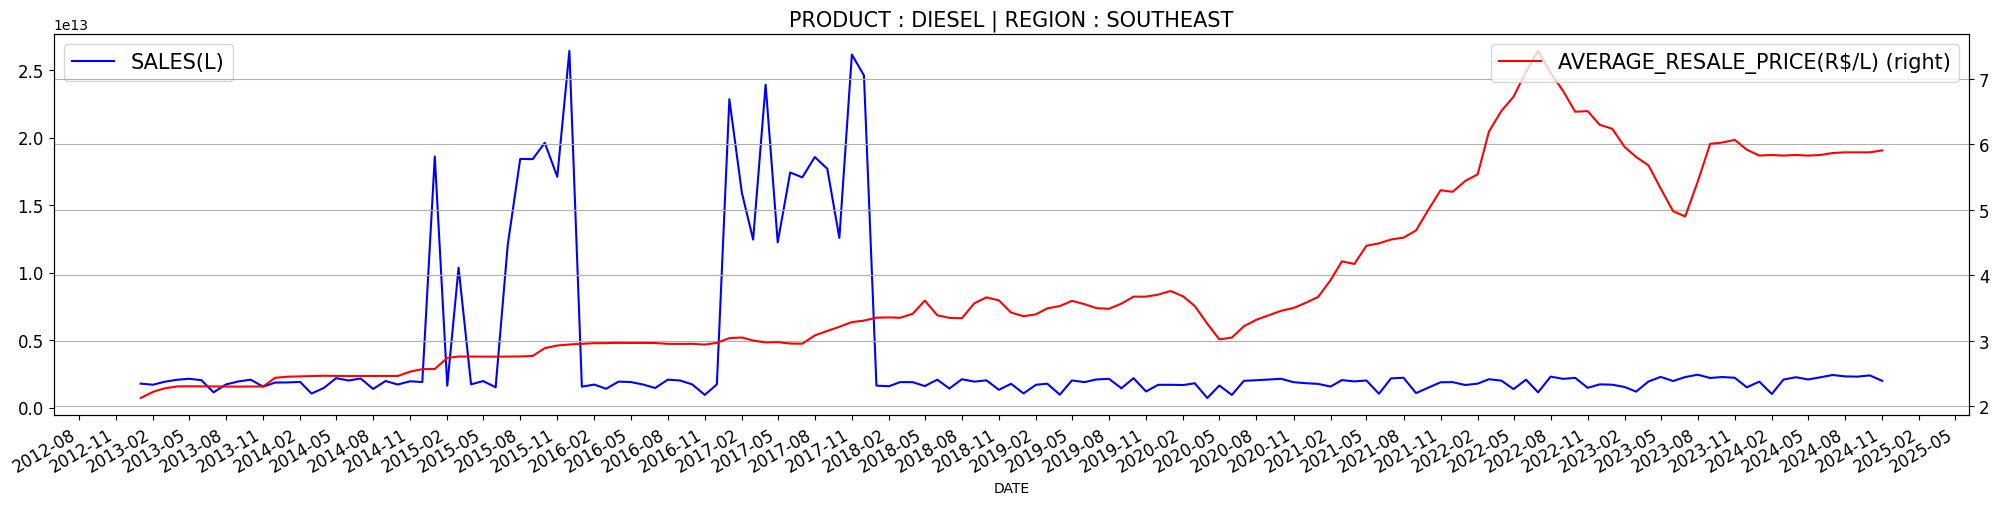

In [31]:
import matplotlib.dates as mdates

dataframe = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg


if convert_to_en == True:

    label_1 = 'PRODUCT'
    label_2 = 'REGION'
    label_3 = 'DATE'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2013, 2025, 1))

    x_variable = 'SALES'
    y_variable = 'AVERAGE_RESALE_PRICE'

    unity_1 = '(L)'
    unity_2 = '(R$/L)'

if convert_to_en == False:
    label_1 = 'PRODUTO'
    label_2 = 'REGIÃO'
    label_3 = 'DATA'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2013, 2025, 1))

    x_variable = 'VENDAS'
    y_variable = 'PREÇO_MÉDIO_REVENDA'

    unity_1 = '(L)'
    unity_2 = '(R$/L)'    

for fuel_type in range(0, len(Filters_Fuel))[0 : 1]:
    for region_name in range(0, len(Filters_Region)):#[1 : 2]:

        df = dataframe.loc[Filters_Fuel[fuel_type] & Filters_Region[region_name]]#.copy()
        
        df = df[df[label_3].dt.year.isin(list_years)]

        print(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}')

        df = df.set_index(label_3)

        #display(df.head())
        #display(df.tail())

        #df.plot(kind = 'line', y = x_variable, x = label_3)
        #df.plot(kind = 'line', y = y_variable, x = label_3)
        fig = plt.figure(figsize = (20,5))
        ax = df[x_variable].plot(kind = 'line', label = x_variable + unity_1, color = 'blue')
        ax2 = df[y_variable].plot(kind = 'line', label = y_variable + unity_2, color = 'red', secondary_y = True)
        ax.legend(loc = 'upper left', prop = {'size': 15})
        ax2.legend(loc = 'upper right', prop = {'size': 15})
        ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
        ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
        plt.title(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]}', fontsize = 15) #  | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}
        plt.grid()
        plt.tight_layout(pad = 1)
        #plt.xticks(list(df.index), rotation = 'vertical')
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        fig = ax.get_figure()
        
        plt.show()
        file_name = f'Time_Series_{x_variable}_{y_variable}_{df[label_1].values[0]}_{df[label_2].values[0]}.jpeg'        
        #fig.savefig(
        #    Output_Fig + file_name, 
        #    format = 'jpeg', # 'pdf',
del df

### Ploting Price-Sales Scatter

In [32]:
#len(Filters_Fuel)
#len(Filters_Region)
#f'{label_3} : {df[label_3].min().year} - {df[label_3].max().year}'
#Filter_Date[1]
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['DATE'].unique()
#len(ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[label_3].dt.year.unique())
#int(len(ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[label_3].dt.year.unique())/3)

PRODUCT : DIESEL | REGION : CENTRAL-WEST | DATE : 2013 - 2024
	 df:


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
0,DIESEL,CENTRAL-WEST,2013-01-01,2.257,2.641169e+11
1,DIESEL,CENTRAL-WEST,2013-02-01,2.363,3.585734e+11
2,DIESEL,CENTRAL-WEST,2013-03-01,2.409,2.659965e+11
3,DIESEL,CENTRAL-WEST,2013-04-01,2.443,5.551729e+11
4,DIESEL,CENTRAL-WEST,2013-05-01,2.445,5.129985e+11


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
137,DIESEL,CENTRAL-WEST,2024-07-01,5.93,8.765463e+11
138,DIESEL,CENTRAL-WEST,2024-08-01,5.95,8.588369e+11
139,DIESEL,CENTRAL-WEST,2024-09-01,5.93,5.640226e+11
140,DIESEL,CENTRAL-WEST,2024-10-01,5.93,6.047110e+11
141,DIESEL,CENTRAL-WEST,2024-11-01,5.95,7.412758e+11


	 df.describe():


,count,mean,min,25%,50%,75%,max,std
DATE,142,2018-11-26 11:29:34.647887360,2013-01-01 00:00:00,2015-12-08 18:00:00,2018-11-16 00:00:00,2021-11-23 12:00:00,2024-11-01 00:00:00,NaN
AVERAGE_RESALE_PRICE,142.0,4.042408,2.257,3.1115,3.6205,5.1595,7.53,1.364723
SALES,142.0,1827790270338.028076,84467019000.0,471928720500.0,574881092500.0,743815905500.0,16617147116000.0,3400241470837.654785


	 Plot SALES x AVERAGE_RESALE_PRICE:


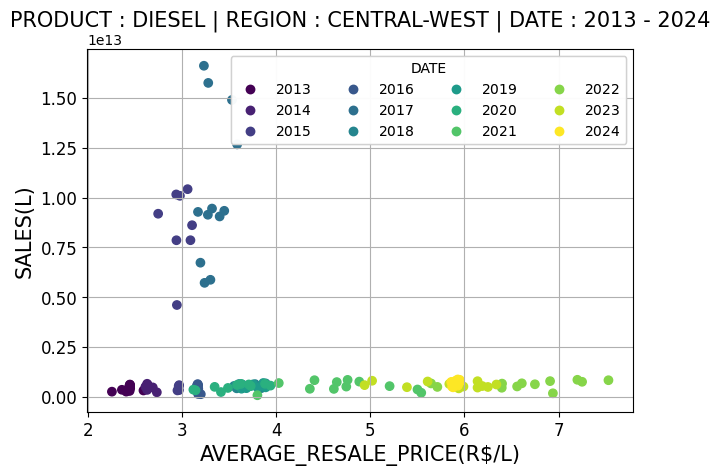


------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : NORTH | DATE : 2013 - 2024
	 df:


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
142,DIESEL,NORTH,2013-01-01,2.285,3.731369e+11
143,DIESEL,NORTH,2013-02-01,2.380,3.019571e+11
144,DIESEL,NORTH,2013-03-01,2.412,3.104811e+11
145,DIESEL,NORTH,2013-04-01,2.443,4.502577e+11
146,DIESEL,NORTH,2013-05-01,2.449,3.240723e+11


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
279,DIESEL,NORTH,2024-07-01,6.29,4.900831e+11
280,DIESEL,NORTH,2024-08-01,6.34,4.789078e+11
281,DIESEL,NORTH,2024-09-01,6.32,1.943166e+11
282,DIESEL,NORTH,2024-10-01,6.37,4.737889e+11
283,DIESEL,NORTH,2024-11-01,6.44,3.758437e+11


	 df.describe():


,count,mean,min,25%,50%,75%,max,std
DATE,142,2018-11-26 11:29:34.647887360,2013-01-01 00:00:00,2015-12-08 18:00:00,2018-11-16 00:00:00,2021-11-23 12:00:00,2024-11-01 00:00:00,NaN
AVERAGE_RESALE_PRICE,142.0,4.14338,2.285,3.16475,3.5895,5.32,7.68,1.455094
SALES,142.0,4743998691225.352539,165442366000.0,325698927250.0,389832527500.0,460755085000.0,39276554602000.0,11050455112563.492188


	 Plot SALES x AVERAGE_RESALE_PRICE:


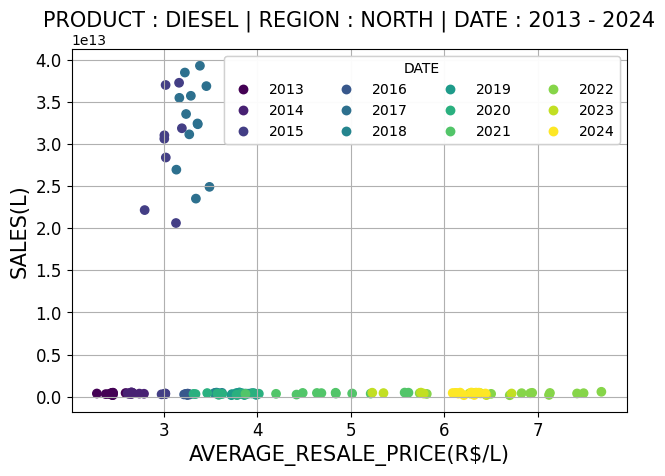


------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : NORTHEAST | DATE : 2013 - 2024
	 df:


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
284,DIESEL,NORTHEAST,2013-01-01,2.111,3.877181e+11
285,DIESEL,NORTHEAST,2013-02-01,2.219,4.269432e+11
286,DIESEL,NORTHEAST,2013-03-01,2.265,5.683804e+11
287,DIESEL,NORTHEAST,2013-04-01,2.296,3.861413e+11
288,DIESEL,NORTHEAST,2013-05-01,2.298,6.847344e+11


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
421,DIESEL,NORTHEAST,2024-07-01,5.99,6.280885e+11
422,DIESEL,NORTHEAST,2024-08-01,5.97,5.626757e+11
423,DIESEL,NORTHEAST,2024-09-01,5.90,6.621029e+11
424,DIESEL,NORTHEAST,2024-10-01,5.92,7.519020e+11
425,DIESEL,NORTHEAST,2024-11-01,5.95,5.853694e+11


	 df.describe():


,count,mean,min,25%,50%,75%,max,std
DATE,142,2018-11-26 11:29:34.647887360,2013-01-01 00:00:00,2015-12-08 18:00:00,2018-11-16 00:00:00,2021-11-23 12:00:00,2024-11-01 00:00:00,NaN
AVERAGE_RESALE_PRICE,142.0,3.923908,2.111,2.9645,3.421,5.087,7.53,1.433485
SALES,142.0,4889418237950.704102,171862596000.0,524167815750.0,613097539500.0,698471152000.0,37880671262000.0,10753241059108.185547


	 Plot SALES x AVERAGE_RESALE_PRICE:


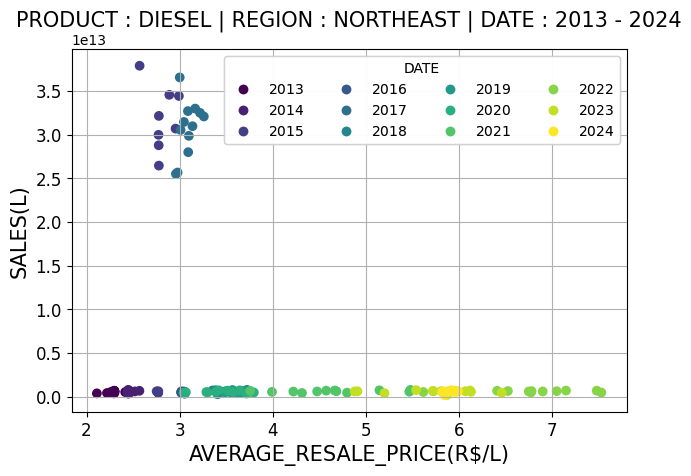


------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : SOUTH | DATE : 2013 - 2024
	 df:


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
426,DIESEL,SOUTH,2013-01-01,2.141,8.452383e+11
427,DIESEL,SOUTH,2013-02-01,2.225,8.008006e+11
428,DIESEL,SOUTH,2013-03-01,2.281,9.178441e+11
429,DIESEL,SOUTH,2013-04-01,2.310,1.008400e+12
430,DIESEL,SOUTH,2013-05-01,2.306,6.408245e+11


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
563,DIESEL,SOUTH,2024-07-01,5.89,6.717562e+11
564,DIESEL,SOUTH,2024-08-01,5.91,6.745380e+11
565,DIESEL,SOUTH,2024-09-01,5.91,1.138427e+12
566,DIESEL,SOUTH,2024-10-01,5.92,7.590813e+11
567,DIESEL,SOUTH,2024-11-01,5.95,1.159891e+12


	 df.describe():


,count,mean,min,25%,50%,75%,max,std
DATE,142,2018-11-26 11:29:34.647887360,2013-01-01 00:00:00,2015-12-08 18:00:00,2018-11-16 00:00:00,2021-11-23 12:00:00,2024-11-01 00:00:00,NaN
AVERAGE_RESALE_PRICE,142.0,3.806577,2.141,2.85575,3.2695,4.9675,7.33,1.389218
SALES,142.0,2046205935852.112793,338486934000.0,838179642250.0,983142123500.0,1104802553000.0,11048305641000.0,2861056362793.16748


	 Plot SALES x AVERAGE_RESALE_PRICE:


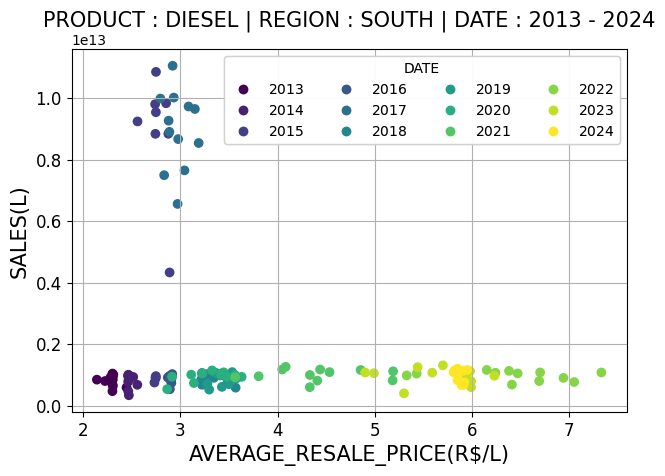


------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : SOUTHEAST | DATE : 2013 - 2024
	 df:


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
568,DIESEL,SOUTHEAST,2013-01-01,2.126,1.772949e+12
569,DIESEL,SOUTHEAST,2013-02-01,2.221,1.693655e+12
570,DIESEL,SOUTHEAST,2013-03-01,2.273,1.910295e+12
571,DIESEL,SOUTHEAST,2013-04-01,2.303,2.059402e+12
572,DIESEL,SOUTHEAST,2013-05-01,2.305,2.134270e+12


,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
705,DIESEL,SOUTHEAST,2024-07-01,5.87,2.414586e+12
706,DIESEL,SOUTHEAST,2024-08-01,5.88,2.309771e+12
707,DIESEL,SOUTHEAST,2024-09-01,5.88,2.292004e+12
708,DIESEL,SOUTHEAST,2024-10-01,5.88,2.383638e+12
709,DIESEL,SOUTHEAST,2024-11-01,5.91,1.982962e+12


	 df.describe():


,count,mean,min,25%,50%,75%,max,std
DATE,142,2018-11-26 11:29:34.647887360,2013-01-01 00:00:00,2015-12-08 18:00:00,2018-11-16 00:00:00,2021-11-23 12:00:00,2024-11-01 00:00:00,NaN
AVERAGE_RESALE_PRICE,142.0,3.872042,2.126,2.9425,3.383,4.99125,7.43,1.392027
SALES,142.0,4094035547985.915527,708159926000.0,1675465986750.0,1929174607500.0,2179596039000.0,26418451674000.0,5973093305647.359375


	 Plot SALES x AVERAGE_RESALE_PRICE:


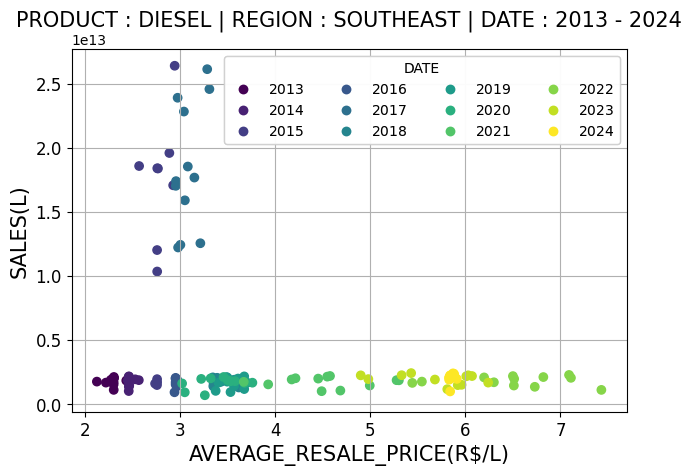


------------------------------------------------------------------------------------------


In [33]:
#df = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[Filter_DIESEL & Filter_CENTRAL_WEST]
#df = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[Filter_HYDRATED_ETHANOL & Filter_CENTRAL_WEST]
#df = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg[Filter_REGULAR_GASOLINE & Filter_CENTRAL_WEST]

dataframe = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg

if convert_to_en == True:

    label_1 = 'PRODUCT'
    label_2 = 'REGION'
    label_3 = 'DATE'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2013, 2025, 1))

    #x_variable = 'SALES'
    #y_variable = 'AVERAGE_RESALE_PRICE'
    #unity_1 = '(L)'
    #unity_2 = '(R$/L)'    
    x_variable = 'AVERAGE_RESALE_PRICE'
    y_variable = 'SALES'
    unity_1 = '(R$/L)'
    unity_2 = '(L)'



if convert_to_en == False:

    label_1 = 'PRODUTO'
    label_2 = 'REGIÃO'
    label_3 = 'DATA'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2013, 2025, 1))
    
    x_variable = 'VENDAS'
    y_variable = 'PREÇO_MÉDIO_REVENDA'    
    unity_1 = '(L)'
    unity_2 = '(R$/L)'
    #x_variable = 'PREÇO_MÉDIO_REVENDA'
    #y_variable = 'VENDAS'
    #unity_1 = '(R$/L)'
    #unity_2 = '(L)'

    


for fuel_type in range(0, len(Filters_Fuel))[0 : 1]:
    for region_name in range(0, len(Filters_Region)):#[1 : 2]:

        df = dataframe.loc[Filters_Fuel[fuel_type] & Filters_Region[region_name]]#.copy()
        
        df = df[df[label_3].dt.year.isin(list_years)]

        print(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}')
        
        x = df[x_variable]
        #x2 = df[label_3]
        y = df[y_variable]
        
    
        print('\t df:')
        display(df.head())
        display(df.tail())
    
        print('\t df.describe():')
        display(df.describe().T)
    
        print(f'\t Plot {y_variable} x {x_variable}:')
        
        ###
#        plt.xlabel (x_variable + unity_1)
#        plt.ylabel (y_variable + unity_2)
#        plt.title(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}')
#        plt.grid()
#        #plt.xticks (per_data['RELEASE'])
#        plt.tight_layout(pad = 1)
#        plt.legend(loc = 'best')
#        plt.scatter(
#            x, 
#            y, 
#            #s = area, 
#            c = df[label_3].dt.year, 
#            # alpha = 0.5
#            )
#        plt.show()
        ###

        fig, ax = plt.subplots()

        scatter = ax.scatter(
            x, 
            y, 
            #s = area, 
            c = df[label_3].dt.year,
            #marker = df[label_3].dt.year, 
            # alpha = 0.5
            )
        
        ###
        #def datafunc(x):
        #    return df[label_3]
        #secax = ax.secondary_xaxis(
        #    'top', 
        #    functions = datafunc
        #    )
        #secax.set_xlabel(label_3)
        ###

        legend1 = ax.legend(*scatter.legend_elements(
            num = len(df[label_3].dt.year.unique())), 
            loc = "upper right", 
            title = label_3,
            ncol = int(len(df[label_3].dt.year.unique())/3),
            fontsize = 10,
            )

        plt.xlabel (x_variable + unity_1, fontsize = 15)
        plt.ylabel (y_variable + unity_2, fontsize = 15)
        plt.title(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}', fontsize = 15)
        plt.grid()
        plt.tight_layout(pad = 1)
        ax.add_artist(legend1)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
        plt.show()
        file_name = f'Scatter_{x_variable}_{y_variable}_{df[label_1].values[0]}_{df[label_2].values[0]}.jpeg'        
        #fig.savefig(
        #    Output_Fig + file_name, 
        #    format = 'jpeg', #'pdf',
        #    )
        print('')        
        print(30 * '---')
del df

### Linear Approach to Revenue

%%latex

Once the Quantity as a function can be described as:
$$
\begin{equation}
Q = a + \bigg(E_{P}^{D} \frac{\overline{Q}}{{P}}\bigg) P \\ \
\end{equation}
$$

We define the Revenue for a diferetial variation in Price as:

$$
\begin{equation}
R = \int_{0}^{P} Q dP =  \int_{0}^{P} \bigg[a + \bigg(E_{P}^{D} \frac{Q_{m}}{P_{m}}\bigg) P\bigg] dP = aP + \frac{1}{2}\bigg(E_{P}^{D} \frac{Q_{m}}{P_{m}}\bigg) P^{2}\\ \
\end{equation}
$$




In [34]:
ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg

,PRODUCT,REGION,DATE,AVERAGE_RESALE_PRICE,SALES
0,DIESEL,CENTRAL-WEST,2013-01-01,2.257,2.641169e+11
1,DIESEL,CENTRAL-WEST,2013-02-01,2.363,3.585734e+11
2,DIESEL,CENTRAL-WEST,2013-03-01,2.409,2.659965e+11
3,DIESEL,CENTRAL-WEST,2013-04-01,2.443,5.551729e+11
4,DIESEL,CENTRAL-WEST,2013-05-01,2.445,5.129985e+11
...,...,...,...,...,...
2835,REGULAR GASOLINE,SOUTHEAST,2024-07-01,5.890,1.391400e+12
2836,REGULAR GASOLINE,SOUTHEAST,2024-08-01,6.020,1.499575e+12
2837,REGULAR GASOLINE,SOUTHEAST,2024-09-01,6.000,1.329189e+12
2838,REGULAR GASOLINE,SOUTHEAST,2024-10-01,6.000,1.447533e+12


In [35]:
#ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg['PRODUCT'].unique

PRODUCT : DIESEL | REGION : CENTRAL-WEST | DATE : 2013 - 2024
	 Regression:
		 intercept: 3967278558716.27
		 slope: -529260789568.54
		 coefficient_pvalue: 0.01
		 result.summary():
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     6.616
Date:                Tue, 14 Jan 2025   Prob (F-statistic):             0.0111
Time:                        14:23:55   Log-Likelihood:                -4295.1
No. Observations:                 142   AIC:                             8594.
Df Residuals:                     140   BIC:                             8600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           

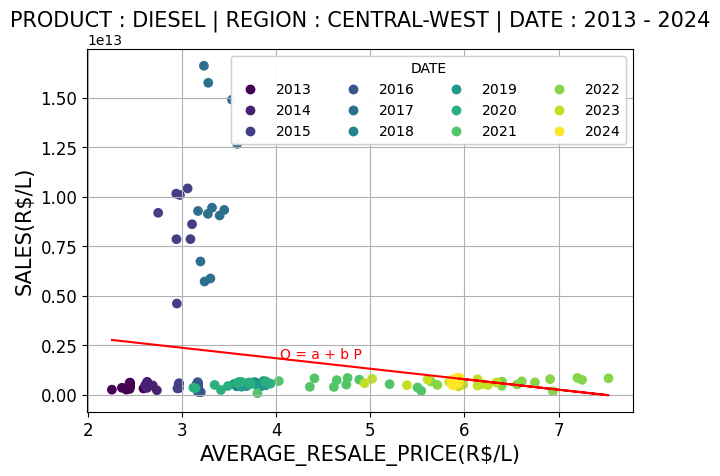

	 Plot REVENUE x AVERAGE_RESALE_PRICE:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


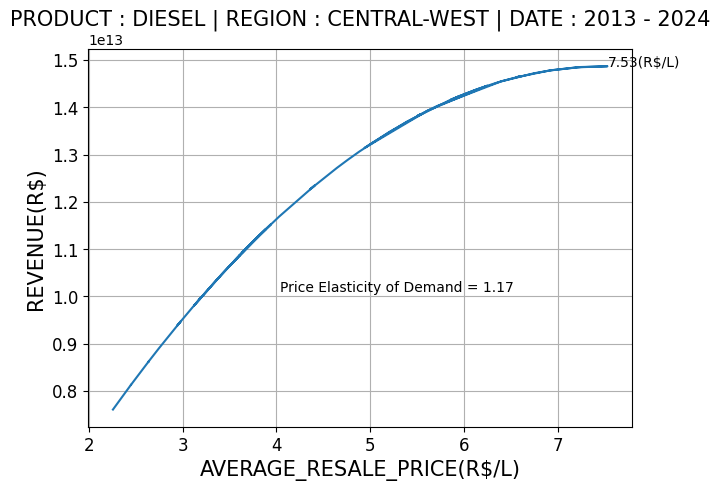

------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : NORTH | DATE : 2013 - 2024
	 Regression:
		 intercept: 12743516400370.35
		 slope: -1930674272041.93
		 coefficient_pvalue: 0.0
		 result.summary():
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.674
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00227
Time:                        14:23:55   Log-Likelihood:                -4461.0
No. Observations:                 142   AIC:                             8926.
Df Residuals:                     140   BIC:                             8932.
Df Model:                           1                                         
Covariance Type:     

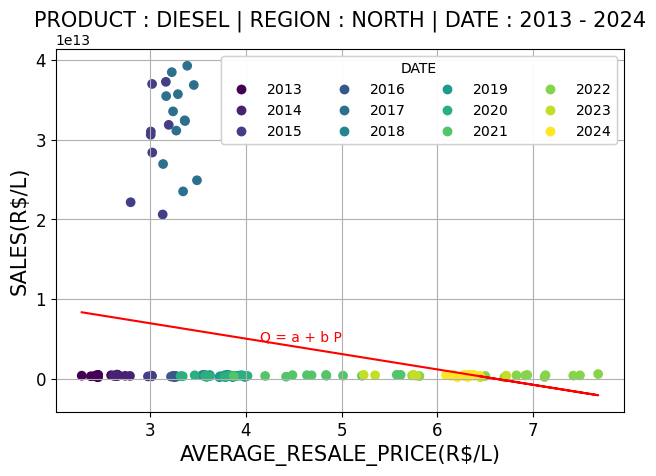

	 Plot REVENUE x AVERAGE_RESALE_PRICE:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


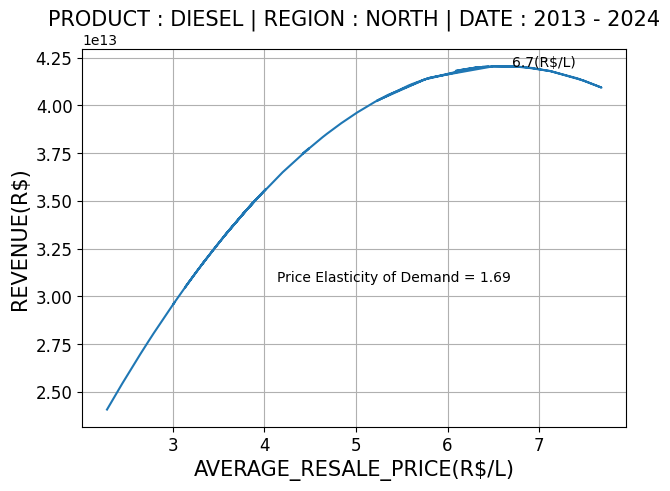

------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : NORTHEAST | DATE : 2013 - 2024
	 Regression:
		 intercept: 12700265211024.79
		 slope: -1990578289784.58
		 coefficient_pvalue: 0.0
		 result.summary():
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     10.60
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00141
Time:                        14:23:55   Log-Likelihood:                -4456.7
No. Observations:                 142   AIC:                             8917.
Df Residuals:                     140   BIC:                             8923.
Df Model:                           1                                         
Covariance Type: 

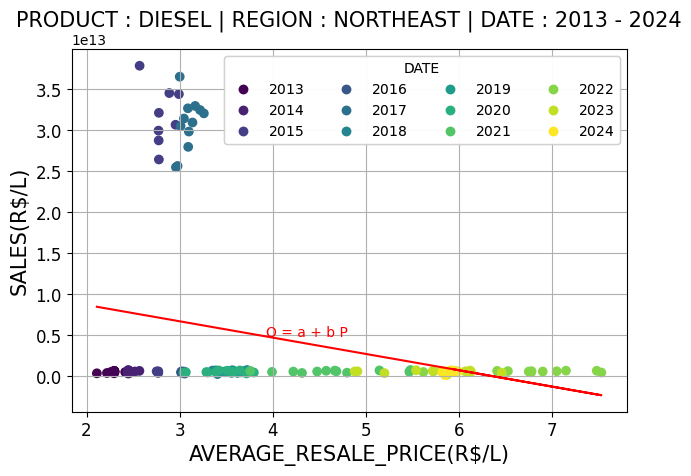

	 Plot REVENUE x AVERAGE_RESALE_PRICE:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


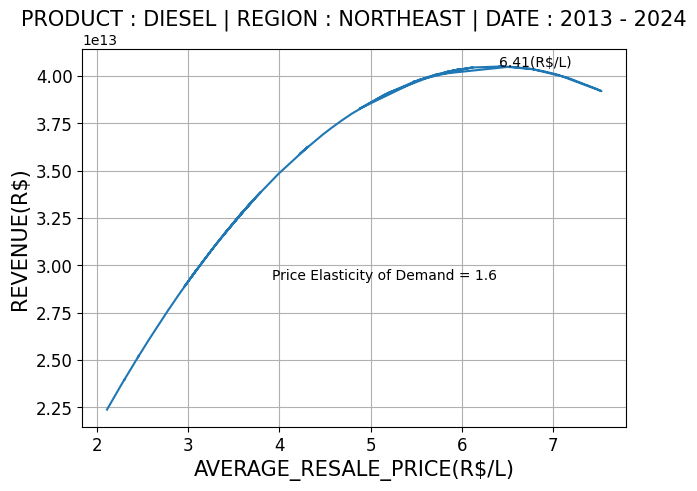

------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : SOUTH | DATE : 2013 - 2024
	 Regression:
		 intercept: 3981868377175.27
		 slope: -508504676242.18
		 coefficient_pvalue: 0.0
		 result.summary():
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     9.089
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00305
Time:                        14:23:55   Log-Likelihood:                -4269.4
No. Observations:                 142   AIC:                             8543.
Df Residuals:                     140   BIC:                             8549.
Df Model:                           1                                         
Covariance Type:       

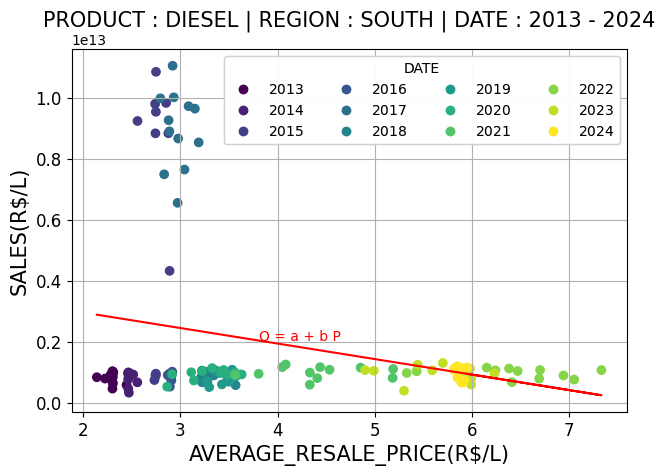

	 Plot REVENUE x AVERAGE_RESALE_PRICE:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


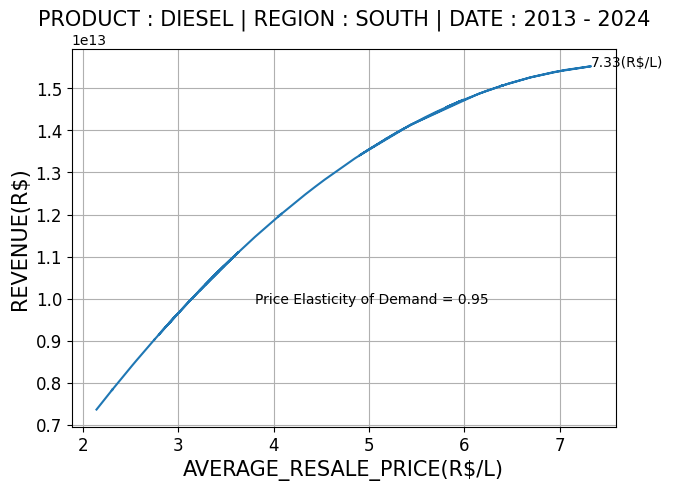

------------------------------------------------------------------------------------------
PRODUCT : DIESEL | REGION : SOUTHEAST | DATE : 2013 - 2024
	 Regression:
		 intercept: 8008328358095.14
		 slope: -1010911698225.83
		 coefficient_pvalue: 0.0
		 result.summary():
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.227
Date:                Tue, 14 Jan 2025   Prob (F-statistic):            0.00477
Time:                        14:23:56   Log-Likelihood:                -4374.3
No. Observations:                 142   AIC:                             8753.
Df Residuals:                     140   BIC:                             8759.
Df Model:                           1                                         
Covariance Type:  

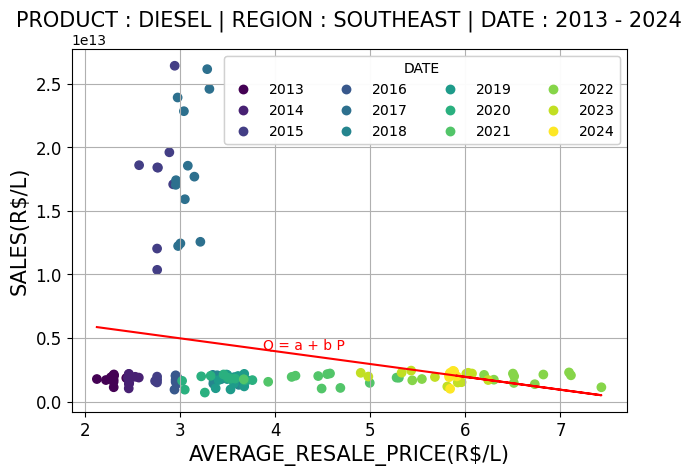

	 Plot REVENUE x AVERAGE_RESALE_PRICE:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


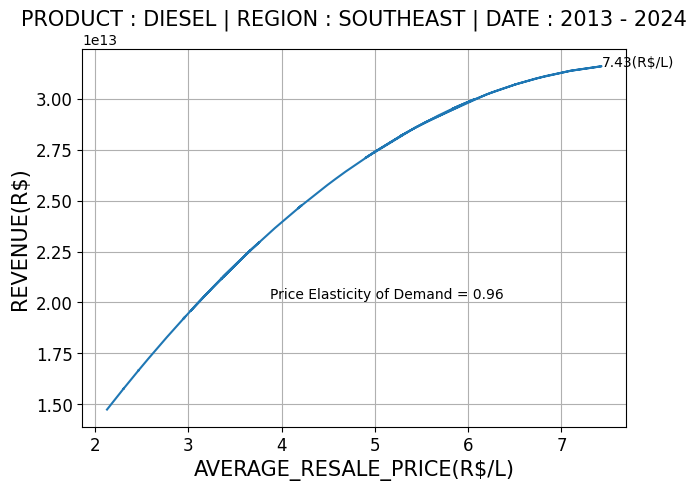

------------------------------------------------------------------------------------------


In [36]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

dataframe = ANP_Price_Sales_Monthly_Regional_2013_2024_edited_agg

if convert_to_en == True:

    label_1 = 'PRODUCT'
    label_2 = 'REGION'
    label_3 = 'DATE'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2020, 2025, 1))

    x_variable = 'AVERAGE_RESALE_PRICE'
    y_variable = 'SALES'
    z_variable = 'REVENUE'

    unity_2 = '(R$/L)'
    unity_3 = '(R$)'

if convert_to_en == False:

    label_1 = 'PRODUTO'
    label_2 = 'REGIÃO'
    label_3 = 'DATA'
    #list_years = list(range(2019, 2025, 1))
    #list_years = list(range(2020, 2025, 1))
    
    x_variable = 'PREÇO_MÉDIO_REVENDA'
    y_variable = 'VENDAS'
    z_variable = 'RECEITA'
    
    unity_2 = '(R$/L)'
    unity_3 = '(R$)'

for fuel_type in range(0, len(Filters_Fuel))[0 : 1]:
    for region_name in range(0, len(Filters_Region)):#[1 : 2]:

        df = dataframe.loc[Filters_Fuel[fuel_type] & Filters_Region[region_name]]#.copy()
        df = df[df[label_3].dt.year.isin(list_years)]
        df.sort_values(by = label_3, inplace = True)
        
        print(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}')

        print('\t Regression:')

        x_value = df[x_variable]
        y_value = df[y_variable]

        X = add_constant(x_value)
        model = sm.OLS(y_value, X)

        result = model.fit()        
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        
        print('\t\t intercept:', round(intercept, 2))
        print('\t\t slope:', round(slope, 2))
        print('\t\t coefficient_pvalue:', round(coefficient_pvalue, 2))
        print('\t\t result.summary():')
        print(result.summary())

        print('')
        p_value_threashold = 0.05
        run_price_elasticity = False
        if (model.fit().pvalues.loc['const'] <= p_value_threashold) & (model.fit().pvalues.loc[x_variable] <= p_value_threashold):
            print('\t We can reject the null hypothesis that Price does not affect Quantity')
            print("\t\t model.fit().pvalues.loc['const']:", round(model.fit().pvalues.loc['const'], 3))
            print(f"\t\t model.fit().pvalues.loc['{x_variable}']:", round(model.fit().pvalues.loc[x_variable], 3))
            run_price_elasticity = True
        if (model.fit().pvalues.loc['const'] > p_value_threashold) | (model.fit().pvalues.loc[x_variable] > p_value_threashold):
            print('\t We can not reject the null hypothesis that Price does not affect Quantity')
            print("\t\t model.fit().pvalues.loc['const']:", round(model.fit().pvalues.loc['const'], 3))
            print(f"\t\t model.fit().pvalues.loc['{x_variable}']:", round(model.fit().pvalues.loc[x_variable], 3))
            run_price_elasticity = False

        print('')
        print('\t Price Elasticity of Demand:')
        #price_elasticity = round(abs(slope), 2)
        #price_elasticity = round(abs(slope * (df[x_variable].mean()/df[y_variable].mean())), 2)
        price_elasticity = slope * (df[x_variable].mean()/df[y_variable].mean()) #round(slope * (df[x_variable].mean()/df[y_variable].mean()), 2)

        #point_price_elasticity = slope * (df[x_variable]/df[y_variable])
        #print('point_price_elasticity:', point_price_elasticity)

        print('\t\t round(abs(price_elasticity), 2):', round(abs(price_elasticity), 2))
        if round(abs(price_elasticity), 2) > 1:
            print('\t\t\t Elastic Demand')    
        if round(abs(price_elasticity), 2) == 1:
            print('\t\t\t Unitary Elastic Demand')
        if round(abs(price_elasticity), 2) < 1:
            print('\t\t\t Inelastic Demand')        

        ###
        price = x_value
        discount_three_periods = 0 #(intercept * 0.5)
        #quantity = intercept + (slope * price) #+ discount_three_periods
        quantity = intercept + (price_elasticity * (df[y_variable].mean() / df[x_variable].mean()) * price) #+ discount_three_periods        
        #demand = intercept * np.power(price, price_elasticity)
        #revenue = price * demand
        #revenue = (intercept * price ** (1 - price_elasticity)) / (1 - price_elasticity)
        #revenue = intercept * price + (price_elasticity * (df[y_variable].mean()/df[x_variable].mean()) * price ** 2) / 2
        #revenue = (intercept * price) + ((slope * price ** 2) / 2)        
        #revenue = intercept * price - ((df[y_variable].mean() / df[x_variable].mean()) * price_elasticity * price ** 2) / 2
        revenue = intercept * price + (price_elasticity * (df[y_variable].mean() / df[x_variable].mean()) * price ** 2) / 2
        #revenue = intercept * price + (slope * price ** 2) / 2
        #revenue = (price_elasticity * price ** 2) / 2
        ###

        revenue_price_df = pd.DataFrame(
            {
                z_variable : revenue,
                x_variable : price,
                #'point_price_elasticity' : point_price_elasticity
                }
            )

        print('Max Revenue:', revenue_price_df[z_variable].max())
        print('Price at Max Revenue:', revenue_price_df[revenue_price_df[z_variable] == revenue_price_df[z_variable].max()][x_variable])
        print(f'\t Plot {y_variable} x {x_variable}:')
        fig, ax = plt.subplots()

        scatter = ax.scatter(
            x_value, 
            y_value, 
            #s = area, 
            c = df[label_3].dt.year,
            #marker = df[label_3].dt.year, 
            # alpha = 0.5
            )
        ax.plot(
            x_value, 
            #revenue_price_df[x_variable], 
            quantity,
            color = 'red'
            )
        
        print('orderOfMagnitude(number = df[y_variable].mean()):', orderOfMagnitude(number = df[y_variable].mean()))
        a = round(intercept/10 ** (orderOfMagnitude(number = df[y_variable].mean()) + 1), 2)
        print('a:', a)
        b = round(slope, 2)
        print('b:', b)
        s = f'Q = {round(intercept, 2)} + {b} P:'
        s = 'Q = a + b P'
        text_x = x_value.mean()
        text_y = y_value.mean() #* 0.5
        plt.text(text_x, text_y, s = s, fontsize = 10, color = 'red')

        legend1 = ax.legend(*scatter.legend_elements(
            num = len(df[label_3].dt.year.unique())), 
            loc = "upper right", 
            title = label_3,
            ncol = int(len(df[label_3].dt.year.unique())/3),
            fontsize = 10,
            )

        plt.xlabel (x_variable + unity_1, fontsize = 15)
        plt.ylabel (y_variable + unity_2, fontsize = 15)
        plt.title(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}', fontsize = 15)
        plt.grid()
        plt.tight_layout(pad = 1)
        ax.add_artist(legend1)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
        plt.show()
#        file_name = f'Scatter_{x_variable}_{y_variable}_{df[label_1].values[0]}_{df[label_2].values[0]}.jpeg'        
        #fig.savefig(
        #    Output_Fig + file_name, 
        #    format = 'jpeg', #'pdf',
        #    )
###
        print(f'\t Plot {z_variable} x {x_variable}:')
        plt.tight_layout(pad = 1)
        plt.ylabel(z_variable + unity_3, fontsize = 15)
        plt.xlabel(x_variable + unity_2, fontsize = 15)
        plt.title(f'{label_1} : {df[label_1].values[0]} | {label_2} : {df[label_2].values[0]} | {label_3} : {df[label_3].min().year} - {df[label_3].max().year}', fontsize = 15)
        plt.grid()
        plt.tight_layout(pad = 1)
        plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
        #plt.legend(loc = 'best').remove()        
        #plt.ylim(revenue_price_df[z_variable].min(), revenue_price_df[z_variable].max())
        #print('revenue_price:', revenue_price_df[z_variable].min(), revenue_price_df[z_variable].max())
        
        plt.plot(
            revenue_price_df[x_variable],
            #point_price_elasticity,            
            revenue_price_df[z_variable], 
            #s = area, 
            #c = df[label_3].dt.year, 
            # alpha = 0.5
            )
        #plt.text(0.5, 0.5, s = s, fontsize = 12)
        
        s = f'Price Elasticity of Demand = {round(abs(price_elasticity), 2)}'        
        text_x = revenue_price_df[x_variable].mean()
        text_z = revenue_price_df[z_variable].mean() * 0.9
        plt.text(text_x, text_z, s = s, fontsize = 10)

        text_x = revenue_price_df[revenue_price_df[z_variable] == revenue_price_df[z_variable].max()][x_variable]
        text_z = revenue_price_df[z_variable].max()
        t = f'{round(abs(revenue_price_df[revenue_price_df[z_variable] == revenue_price_df[z_variable].max()][x_variable].values[0]), 2)}{unity_2}'
        plt.text(text_x, text_z, s = t, fontsize = 10)
        plt.show()
        
        print(30 * '---')
del df        